# Sam Mosavarpour
## Assignment 2
### CSC 447: Machine Learning

---

###  <h1><center>Contents<center><h1>
    

### [Loss Functions](#Loss-Function-Graphs-&-Scores)
### [Score Distribution](#Score-Distribution-for-each-Function)
### [Feature Set Average Score](#Averaged-Scores)
### [Analysis](#Analysis-&-Conclusion)

In [21]:
# author: Erik K. Grimmelmann

In [22]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [23]:
# import the Iris data set

iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [24]:
# set up some stuff for the plots

Xzeros0 = (0. * X) + .2
Xzeros1 = (0. * X) 
Xzeros2 = (0. * X) - .2

x_min, x_max = X.min() - 0.5, X.max() + 1.5

In [25]:
# show the data
# for i in range (len(Y)):
#     print (i, X[i,:],Y[i])

In [26]:
# get Iris classifications

IC = np.unique(Y)
IrisC = ('Setosa','Versicolor','Virginica')
pltC = ('red', 'blue', 'green')
pltCback = ('pink', 'lightblue','lightgreen')
pltM = ('o', 'x', '*')
for i in range(0,3):
    print (IC[i],pltM[i],IrisC[i],pltC[i],pltCback[i])
          

0 o Setosa red pink
1 x Versicolor blue lightblue
2 * Virginica green lightgreen


In [27]:
# setup Iris feature lablels

IrisF=("sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)")
for i in range(0,4):
    print(IrisF[i])


sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


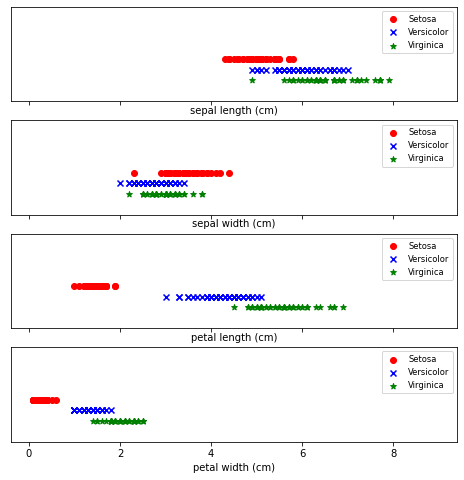

In [28]:
# plot data for all features 

plt.close('all')
fig, ax = plt.subplots(nrows=4, ncols=1, figsize= (8,8), sharex=True)

for i in range(4):
    x1F = IrisF[i] #IrisF["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
    ax[i].scatter(X[Y == IC[0], i], Xzeros0[Y == IC[0],i],
                  color=pltC[0], marker=pltM[0], label=IrisC[0])
    ax[i].scatter(X[Y == IC[1], i], Xzeros1[Y == IC[1],i], 
                  color=pltC[1], marker=pltM[1], label=IrisC[1])
    ax[i].scatter(X[Y == IC[2], i], Xzeros2[Y == IC[2],i], 
                  color=pltC[2], marker=pltM[2], label=IrisC[2])
    ax[i].set_xlim(x_min,x_max)
    ax[i].set_ylim(-.6,+1.2)
    ax[i].set_xlabel(x1F)
    ax[i].axes.yaxis.set_visible(False)
    ax[i].legend(loc='upper right',fontsize='small')
      
plt.show()    

/var/folders/3c/vld36s_502s6mfm444xwbzb40000gn/T/ipykernel_8023/956840861.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  k1 = np.int(k/2)


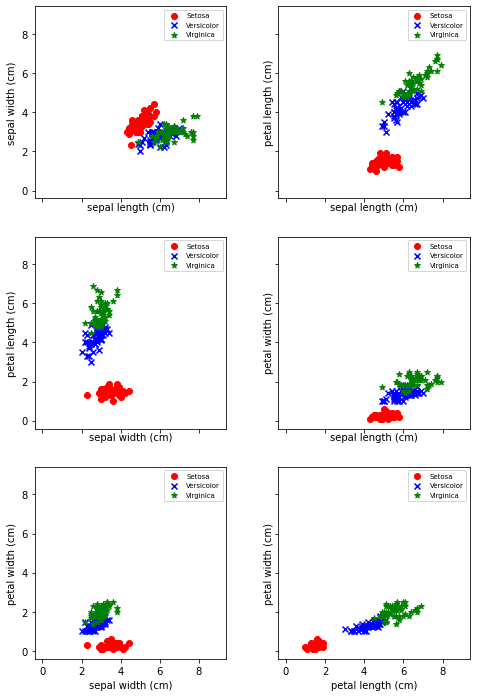

In [29]:
# plot data for all pairs of features 

plt.close('all')
fig, ax = plt.subplots(nrows=3, ncols=2, figsize= (8,12), sharex=True, sharey=True)

i = 0
k = 0
k1 = 0
k2 = 0
while i < 4:
    x2F = IrisF[i]
    j = 0
    while j < i:
        k1 = np.int(k/2)
        k2 = np.mod(k,2)
        x1F = IrisF[j]
        ax[k1,k2].scatter(X[Y == IC[0], j], X[Y == IC[0], i], 
                          color=pltC[0], marker=pltM[0], label=IrisC[0])
        ax[k1,k2].scatter(X[Y == IC[1], j], X[Y == IC[1], i], 
                          color=pltC[1], marker=pltM[1], label=IrisC[1])
        ax[k1,k2].scatter(X[Y == IC[2], j], X[Y == IC[2], i], 
                          color=pltC[2], marker=pltM[2], label=IrisC[2])
        ax[k1,k2].set(aspect='equal')
        ax[k1,k2].set_xlim(x_min,x_max)
        ax[k1,k2].set_ylim(x_min,x_max)
        ax[k1,k2].set_xlabel(x1F)
        ax[k1,k2].set_ylabel(x2F)
        ax[k1,k2].legend(loc='upper right', fontsize='x-small')
        j += 1
        k += 1
    i += 1
plt.show()    

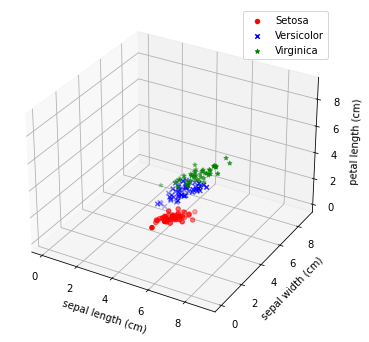

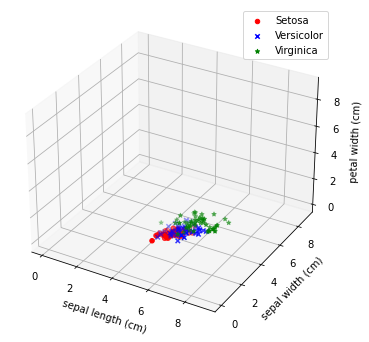

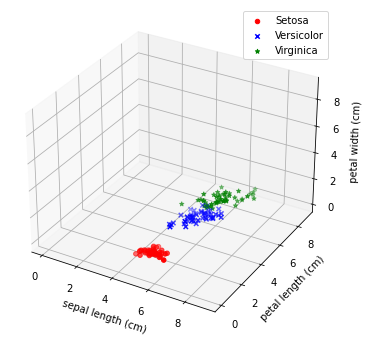

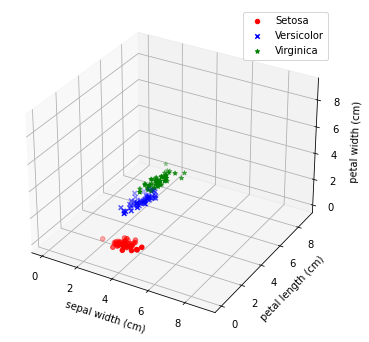

In [30]:
plt.close('all')

ix = [0,0,0,1]
iy = [1,1,2,2]
iz = [2,3,3,3]

for m in range(4):
    
    ixm = ix[m]
    iym = iy[m]
    izm = iz[m]
    xF = IrisF[ixm]
    yF = IrisF[iym]
    zF = IrisF[izm]

    fig = plt.figure(figsize=(6,6))    
    ax = plt.axes(projection='3d')   
    
    ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
        color=pltC[0], marker=pltM[0], label=IrisC[0])
    ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
        color=pltC[1], marker=pltM[1], label=IrisC[1])
    ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
        color=pltC[2], marker=pltM[2], label=IrisC[2])
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(x_min,x_max)
    ax.set_zlim(x_min,x_max)
    ax.set_xlabel(xF)
    ax.set_ylabel(yF)
    ax.set_zlabel(zF)            
    ax.legend(loc='upper right', fontsize='medium')

plt.show()    

In [31]:
def getXXYY(cdx, fdx):
  nC = len(cdx)
  nF = len(fdx)

  # build the XX and YY arrays
  # these arrays contain the samples in the classes specified in cdx and include the features specified in fdx

  i = 0
  numY = 0
  for i in range(len(Y)):
      for j in range(nC):
          if Y[i] == IC[cdx[j]]:
              numY += 1

  YY = np.zeros((numY))
  XX = np.zeros((numY,nF))
  if (len(fdx) == 1):
      XXzeros0 = (0. * XX) + .2
      XXzeros1 = (0. * XX) 
      XXzeros2 = (0. * XX) - .2
  else:   
    XXzeros0, XXzeros1, XXzeros2 = 0, 0, 0 

  j = 0
  for i in range(len(Y)):
      for k in range(nC):
          if Y[i] == IC[cdx[k]]:        
              YY[j] = IC[cdx[k]]
              for m in range(nF):
                  XX[j,m] = X[i,fdx[m]] 
              j += 1
  return XX, YY, XXzeros0, XXzeros1, XXzeros2

In [32]:
lossFunctions = ['hinge', 'log', 'perceptron', 'modified_huber']

In [33]:
def printClasses(cdx):
  temp = "Classes : "
  arr = []
  for i in cdx:
    arr.append(IrisC[i])
  print(temp + ", ".join(arr))

def printFeatures(fdx):
  temp = "Features : "
  arr = []
  for i in fdx:
    arr.append(IrisF[i])
  print(temp + ", ".join(arr))
  print("**********************")

In [34]:
allCombsF = [[0], [1], [2], [3], [0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3], [0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3], [0, 1, 2, 3]]

In [35]:
## plot data for this pair of features and classes

def plot(cdx, fdx, XX, YY, XXzeros0, XXzeros1, XXzeros2):
  plt.close('all')

  if (len(fdx) == 1):
      
      fig, ax = plt.subplots(figsize=(8,2))
      
      xx = np.arange(x_min,x_max, 0.05).reshape((-1,1))
      yy = clf.predict(xx)
      
      xxzeros1 = (0. * xx) + .5

  # plot the decision regions

      if (IC[0] in cdx): ax.scatter(xx[yy == IC[0],0], xxzeros1[yy == IC[0]],
                      color=pltC[0], marker='.')
      if (IC[1] in cdx): ax.scatter(xx[yy == IC[1],0], xxzeros1[yy == IC[1]],
                      color=pltC[1], marker='.')
      if (IC[2] in cdx): ax.scatter(xx[yy == IC[2],0], xxzeros1[yy == IC[2]],
                      color=pltC[2], marker='.')   

  # plot the data

      if (IC[0] in cdx): ax.scatter(XX[YY == IC[0],0], XXzeros0[YY == IC[0]],
                      color=pltC[0], marker=pltM[0], label=IrisC[0])
      if (IC[1] in cdx): ax.scatter(XX[YY == IC[1],0], XXzeros1[YY == IC[1]],
                      color=pltC[1], marker=pltM[1], label=IrisC[1])
      if (IC[2] in cdx): ax.scatter(XX[YY == IC[2],0], XXzeros2[YY == IC[2]],
                      color=pltC[2], marker=pltM[2], label=IrisC[2])    
      
      ax.set_xlim(x_min,x_max)
      ax.set_ylim(-1.,+2.)
      ax.set_xlabel(IrisF[fdx[0]])
      ax.axes.yaxis.set_visible(False)
      ax.legend(loc='upper right', fontsize='x-small')
      plt.show()    

  elif (len(fdx) == 2):
      
      fig, ax = plt.subplots(figsize=(8,8))

      xx1, xx2 = np.meshgrid(np.arange(x_min,x_max,0.05), np.arange(x_min,x_max,0.05))                     
      yy = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
      yy = yy.reshape(xx1.shape)

  # plot the decision regions    
      
      if (IC[0] in cdx): ax.scatter(xx1[yy == IC[0]], xx2[yy == IC[0]],
                      color=pltCback[0], marker='.')
      if (IC[1] in cdx): ax.scatter(xx1[yy == IC[1]], xx2[yy == IC[1]], 
                      color=pltCback[1], marker='.')
      if (IC[2] in cdx): ax.scatter(xx1[yy == IC[2]], xx2[yy == IC[2]],
                      color=pltCback[2], marker='.')    

  # plot the data

      if (IC[0] in cdx): ax.scatter(XX[YY == IC[0],0], XX[YY == IC[0],1],
                      color=pltC[0], marker=pltM[0], label=IrisC[0])
      if (IC[1] in cdx): ax.scatter(XX[YY == IC[1],0], XX[YY == IC[1],1], 
                      color=pltC[1], marker=pltM[1], label=IrisC[1])
      if (IC[2] in cdx): ax.scatter(XX[YY == IC[2],0], XX[YY == IC[2],1],
                      color=pltC[2], marker=pltM[2], label=IrisC[2])
          
      ax.set_xlim(x_min,x_max)
      ax.set_ylim(x_min,x_max)
      ax.set_xlabel(IrisF[fdx[0]])
      ax.set_ylabel(IrisF[fdx[1]])
      ax.legend(loc='upper right', fontsize='small')
      plt.show()    
      
  elif (len(fdx) == 3):
      
      ixm = fdx[0]
      iym = fdx[1]
      izm = fdx[2]
      xF = IrisF[ixm]
      yF = IrisF[iym]
      zF = IrisF[izm]

      fig = plt.figure(figsize=(6,6))    
      ax = plt.axes(projection='3d')   

  # plot the data points

      if (IC[0] in cdx): ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
          color=pltC[0], marker=pltM[0], label=IrisC[0])
      if (IC[1] in cdx): ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
          color=pltC[1], marker=pltM[1], label=IrisC[1])
      if (IC[2] in cdx): ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
          color=pltC[2], marker=pltM[2], label=IrisC[2])    

      ax.set_xlim(x_min,x_max)
      ax.set_ylim(x_min,x_max)
      ax.set_zlim(x_min,x_max)
      ax.set_xlabel(xF)
      ax.set_ylabel(yF)
      ax.set_zlabel(zF)            
      ax.legend(loc='upper right', fontsize='small')
      plt.show() 
      
  # if there are two classes, add the decision boundary and plot again
              
      A = clf.fit(XX,YY)
      Acl =  A.classes_
      if (len(Acl) == 2):  
          
          fig = plt.figure(figsize=(6,6))    
          ax = plt.axes(projection='3d')   

      # plot the data points

          if (IC[0] in cdx): ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
              color=pltC[0], marker=pltM[0], label=IrisC[0])
          if (IC[1] in cdx): ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
              color=pltC[1], marker=pltM[1], label=IrisC[1])
          if (IC[2] in cdx): ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
              color=pltC[2], marker=pltM[2], label=IrisC[2])    

        
          Ai = A.intercept_
          Acoef = A.coef_
          xgrid = np.arange(x_min,x_max,0.05)       
          nx = len(xgrid)
          for i in range(nx):
              for j in range(nx):
                  z = -(Acoef[0,0]*xgrid[i]+Acoef[0,1]*xgrid[j]+Ai[0])/Acoef[0,2]
                  if ((z>=x_min)&(z<=x_max)): ax.scatter3D(xgrid[i],xgrid[j],z,marker='.',color='lightgray')

          ax.set_xlim(x_min,x_max)
          ax.set_ylim(x_min,x_max)
          ax.set_zlim(x_min,x_max)
          ax.set_xlabel(xF)
          ax.set_ylabel(yF)
          ax.set_zlabel(zF)            
          ax.legend(loc='upper right', fontsize='small')
          plt.show()         

In [36]:
allCombsC = [[0, 1], [0, 2], [1, 2], [0, 1, 2]]

# Loss Function Graphs & Scores

Classes : Setosa, Versicolor
Features : sepal length (cm)
**********************


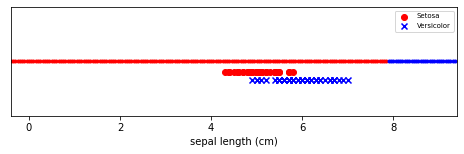

The loss function is : hinge
Score:  0.5
-------------------------


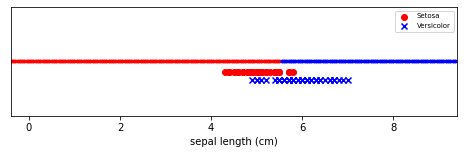

The loss function is : log
Score:  0.86
-------------------------


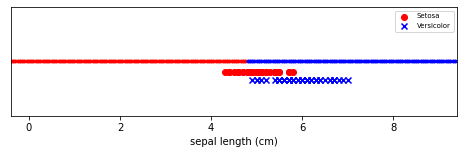

The loss function is : perceptron
Score:  0.61
-------------------------


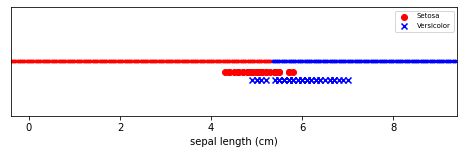

The loss function is : modified_huber
Score:  0.85
-------------------------

Features : sepal width (cm)
**********************


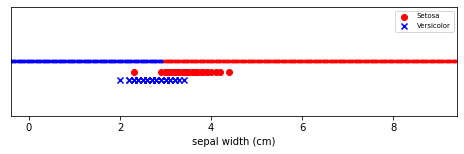

The loss function is : hinge
Score:  0.82
-------------------------


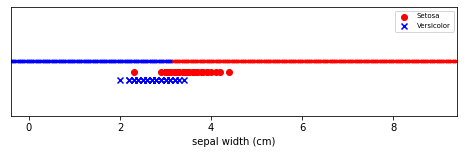

The loss function is : log
Score:  0.83
-------------------------


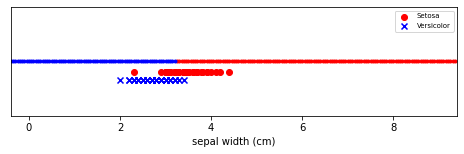

The loss function is : perceptron
Score:  0.81
-------------------------


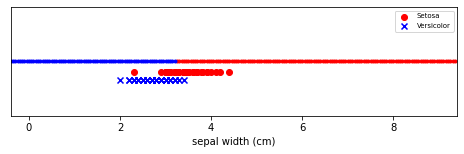

The loss function is : modified_huber
Score:  0.81
-------------------------

Features : petal length (cm)
**********************


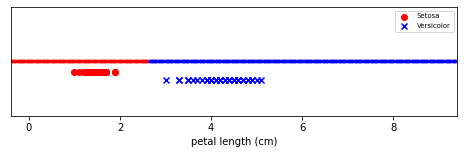

The loss function is : hinge
Score:  1.0
-------------------------


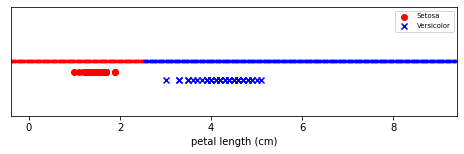

The loss function is : log
Score:  1.0
-------------------------


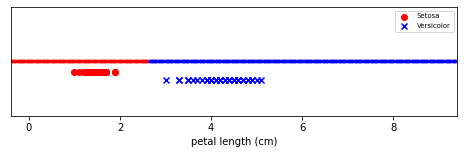

The loss function is : perceptron
Score:  1.0
-------------------------


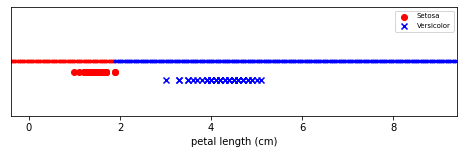

The loss function is : modified_huber
Score:  0.98
-------------------------

Features : petal width (cm)
**********************


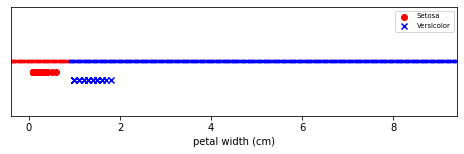

The loss function is : hinge
Score:  1.0
-------------------------


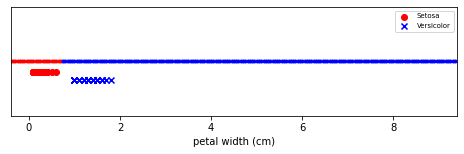

The loss function is : log
Score:  1.0
-------------------------


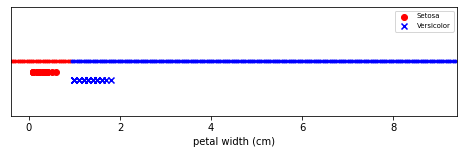

The loss function is : perceptron
Score:  1.0
-------------------------


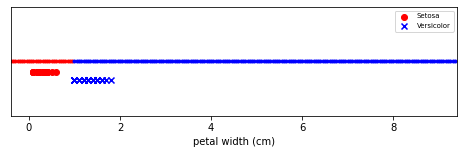

The loss function is : modified_huber
Score:  1.0
-------------------------

Features : sepal length (cm), sepal width (cm)
**********************


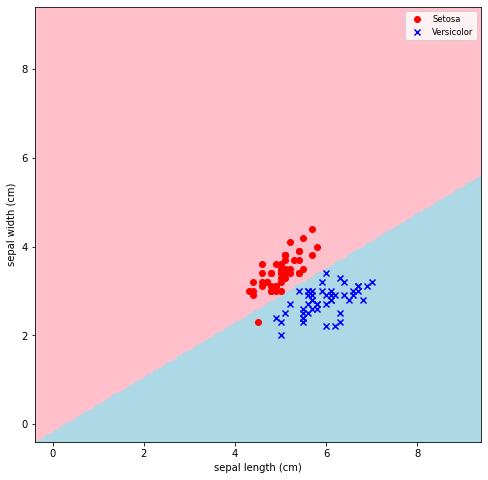

The loss function is : hinge
Score:  0.99
-------------------------


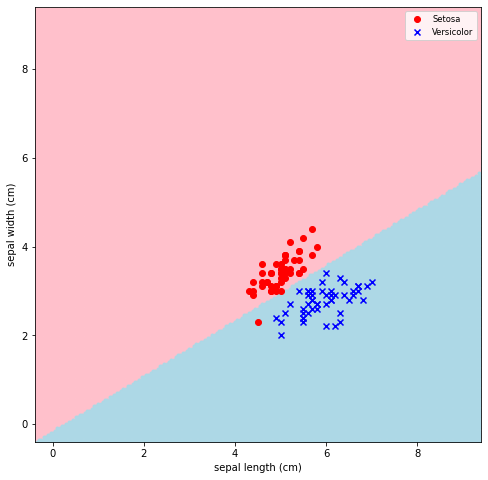

The loss function is : log
Score:  0.99
-------------------------


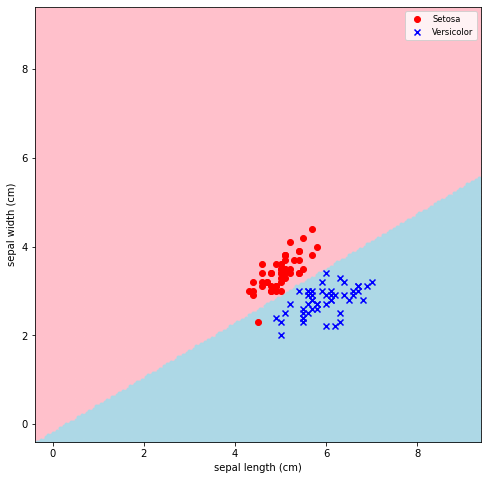

The loss function is : perceptron
Score:  0.99
-------------------------


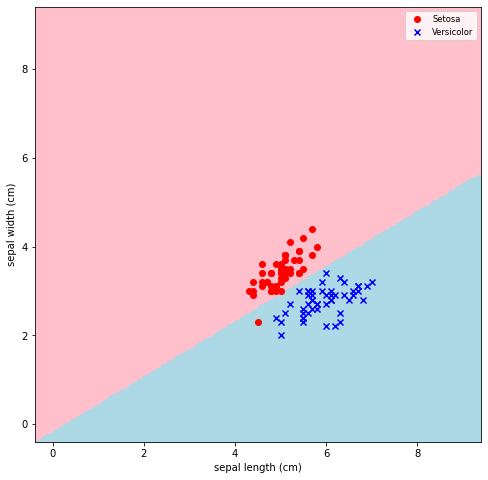

The loss function is : modified_huber
Score:  0.99
-------------------------

Features : sepal length (cm), petal length (cm)
**********************


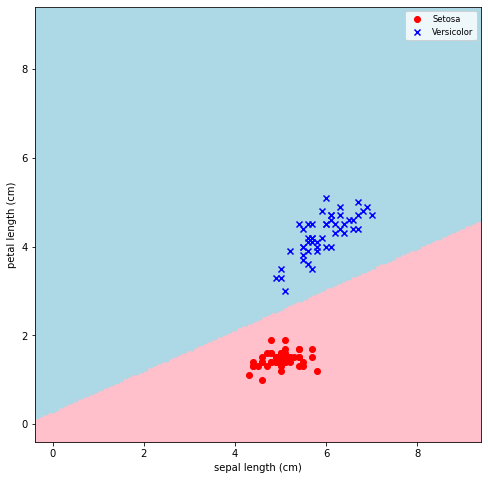

The loss function is : hinge
Score:  1.0
-------------------------


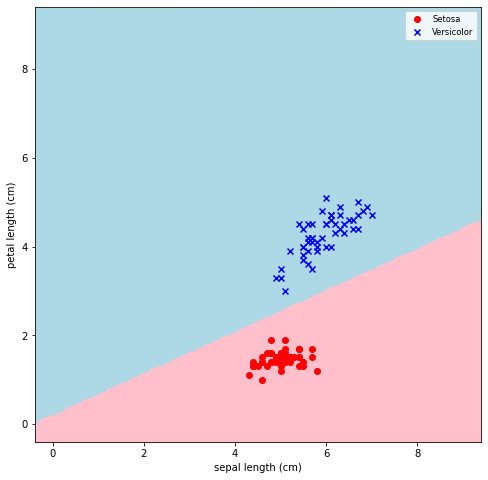

The loss function is : log
Score:  1.0
-------------------------


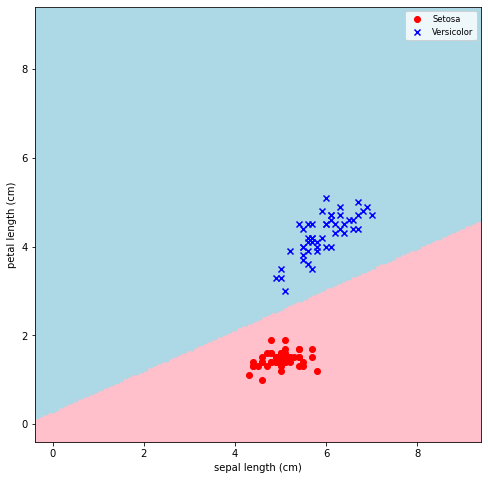

The loss function is : perceptron
Score:  1.0
-------------------------


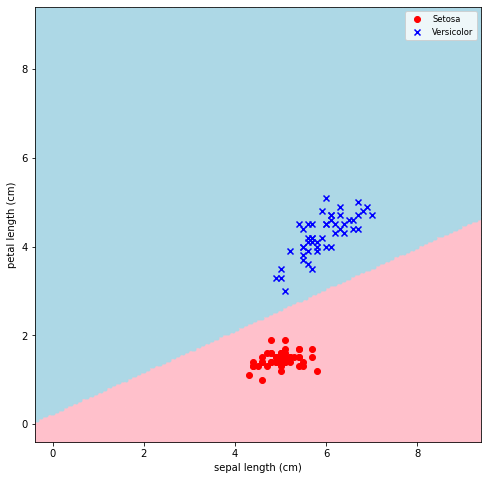

The loss function is : modified_huber
Score:  1.0
-------------------------

Features : sepal length (cm), petal width (cm)
**********************


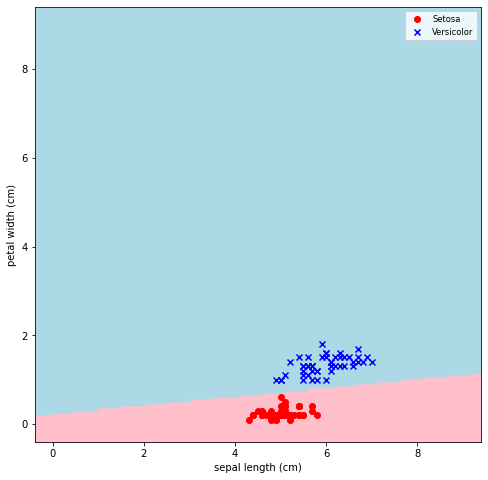

The loss function is : hinge
Score:  1.0
-------------------------


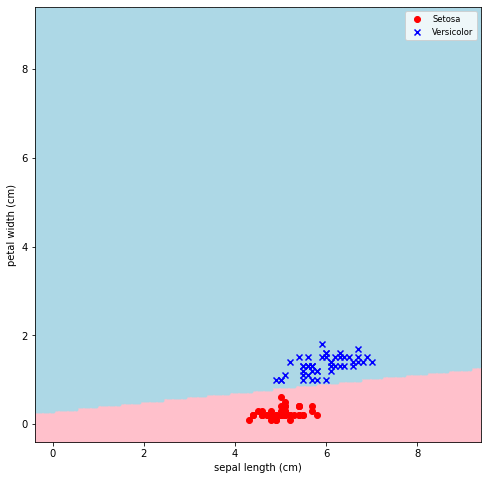

The loss function is : log
Score:  1.0
-------------------------


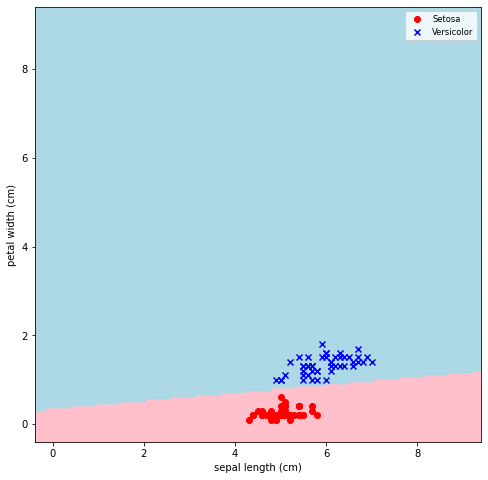

The loss function is : perceptron
Score:  1.0
-------------------------


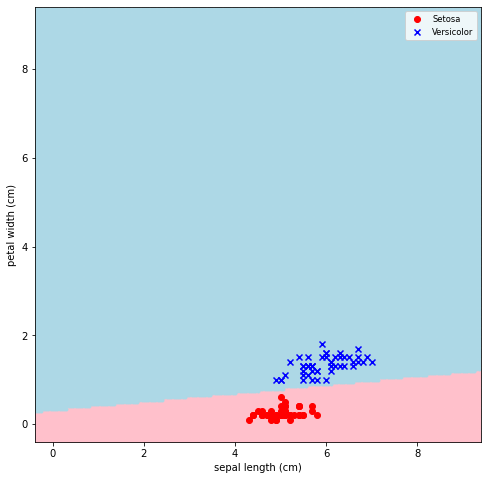

The loss function is : modified_huber
Score:  1.0
-------------------------

Features : sepal width (cm), petal length (cm)
**********************


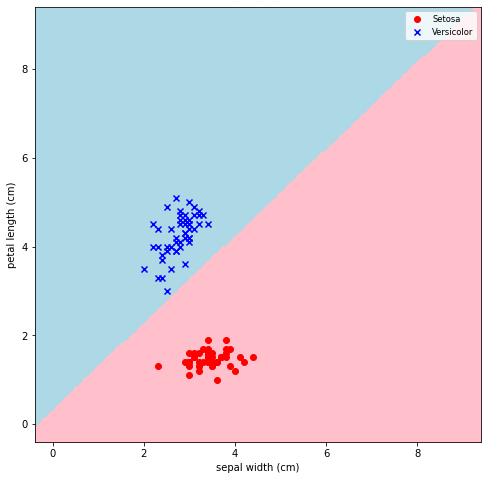

The loss function is : hinge
Score:  1.0
-------------------------


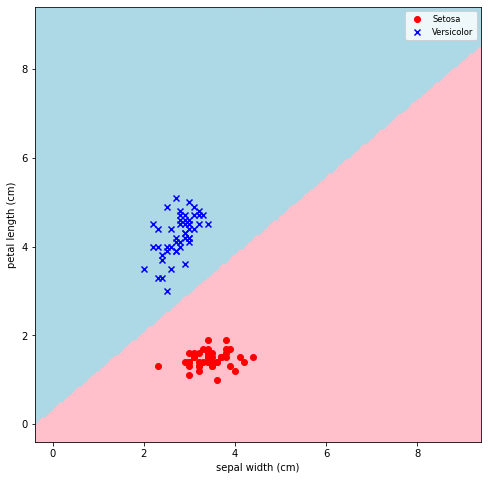

The loss function is : log
Score:  1.0
-------------------------


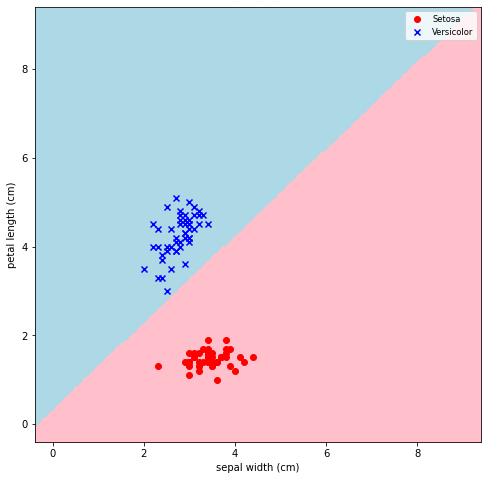

The loss function is : perceptron
Score:  1.0
-------------------------


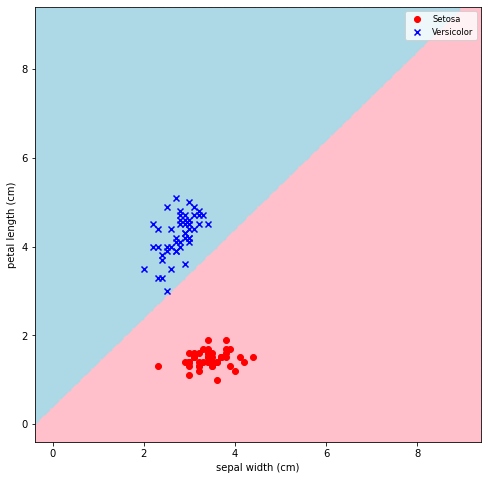

The loss function is : modified_huber
Score:  1.0
-------------------------

Features : sepal width (cm), petal width (cm)
**********************


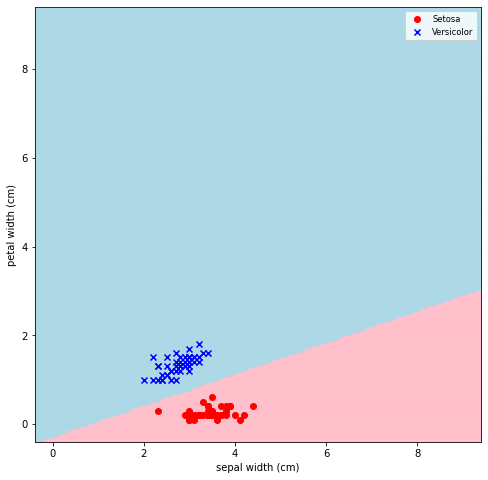

The loss function is : hinge
Score:  1.0
-------------------------


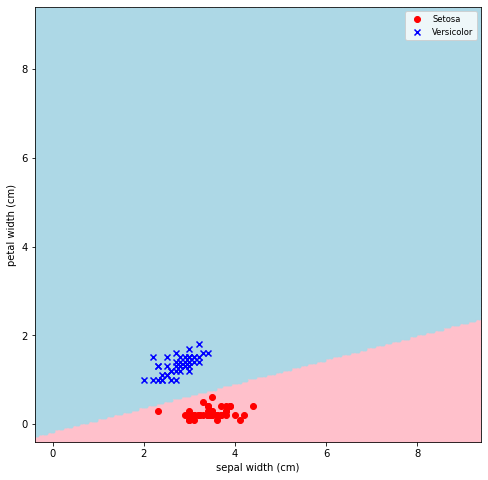

The loss function is : log
Score:  1.0
-------------------------


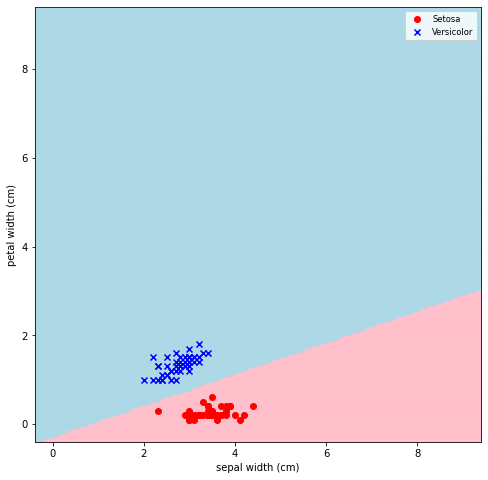

The loss function is : perceptron
Score:  1.0
-------------------------


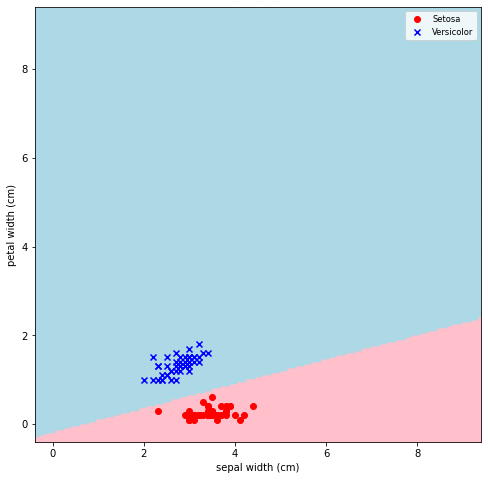

The loss function is : modified_huber
Score:  1.0
-------------------------

Features : petal length (cm), petal width (cm)
**********************


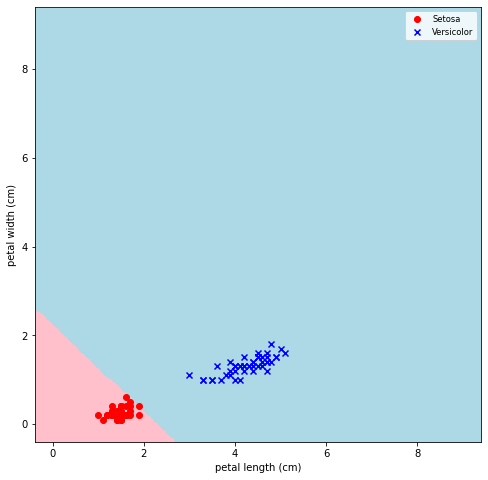

The loss function is : hinge
Score:  1.0
-------------------------


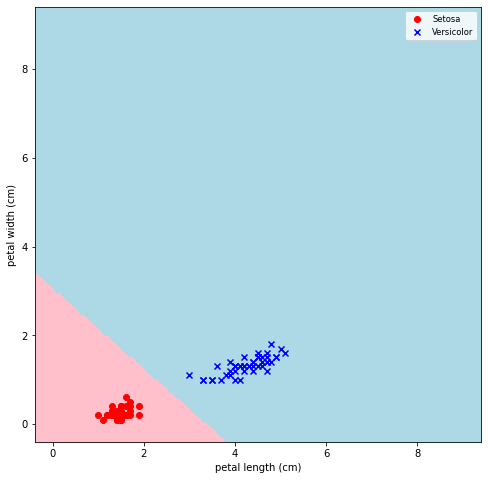

The loss function is : log
Score:  1.0
-------------------------


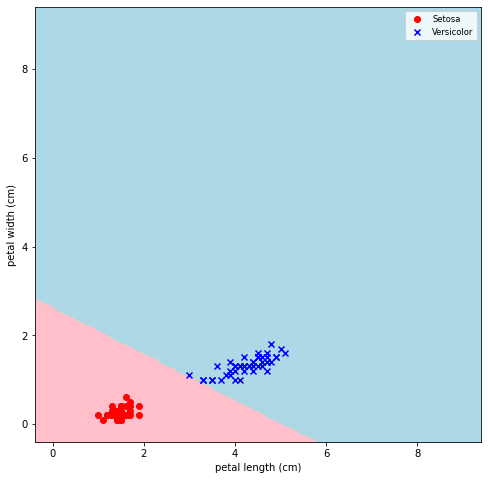

The loss function is : perceptron
Score:  1.0
-------------------------


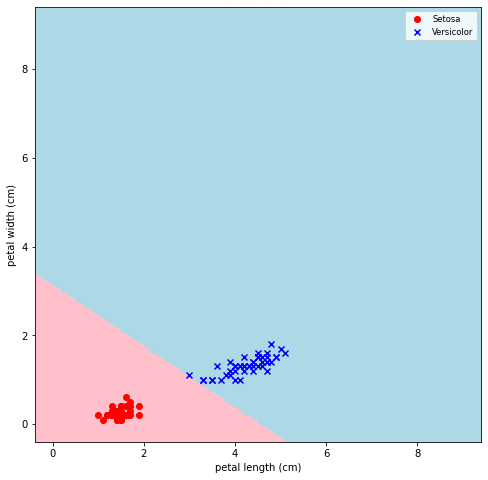

The loss function is : modified_huber
Score:  1.0
-------------------------

Features : sepal length (cm), sepal width (cm), petal length (cm)
**********************


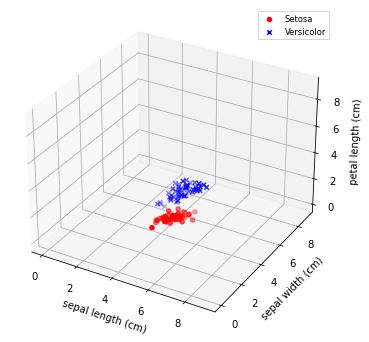

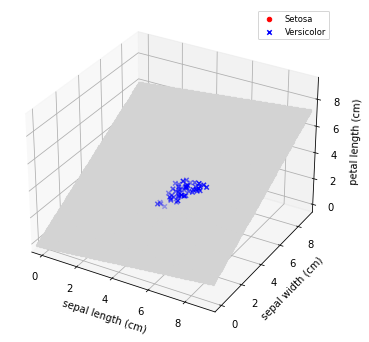

The loss function is : hinge
Score:  1.0
-------------------------


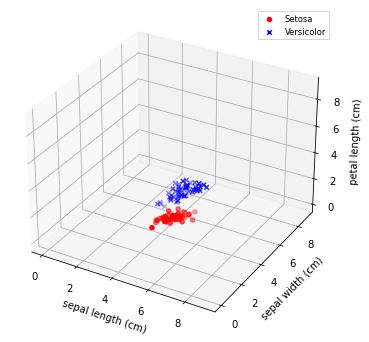

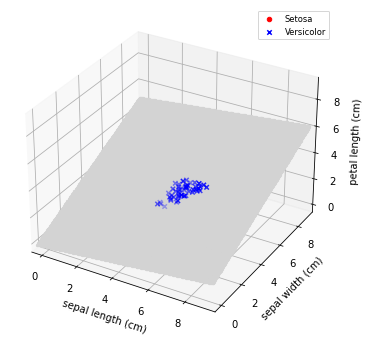

The loss function is : log
Score:  1.0
-------------------------


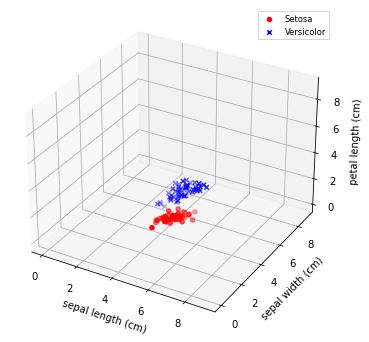

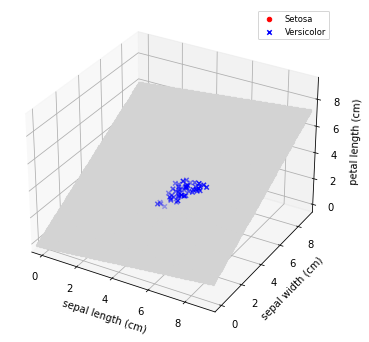

The loss function is : perceptron
Score:  1.0
-------------------------


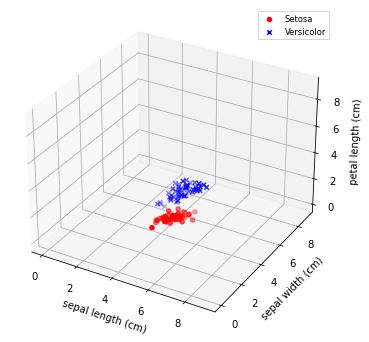

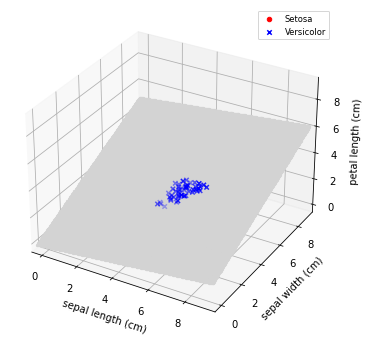

The loss function is : modified_huber
Score:  1.0
-------------------------

Features : sepal length (cm), sepal width (cm), petal width (cm)
**********************


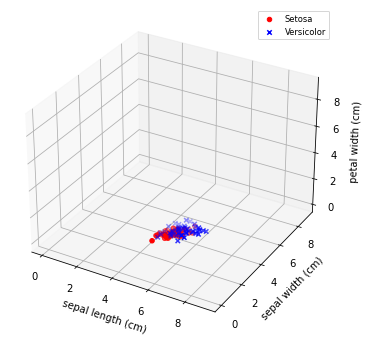

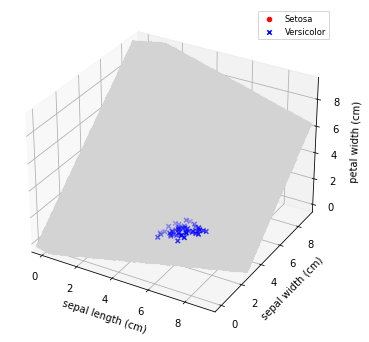

The loss function is : hinge
Score:  1.0
-------------------------


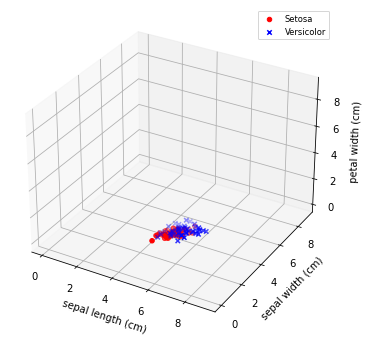

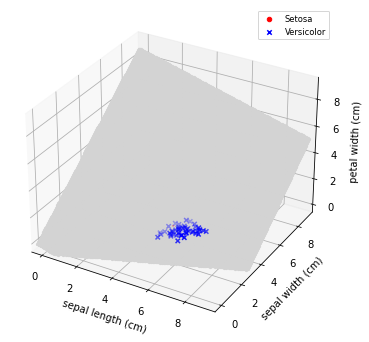

The loss function is : log
Score:  1.0
-------------------------


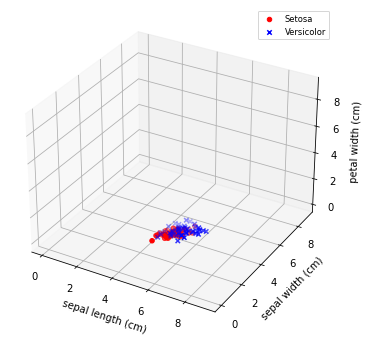

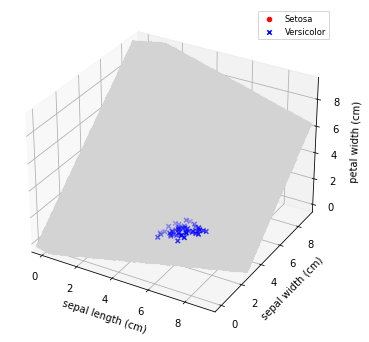

The loss function is : perceptron
Score:  1.0
-------------------------


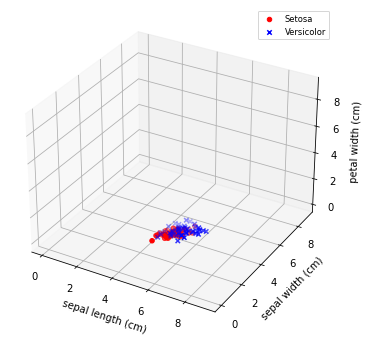

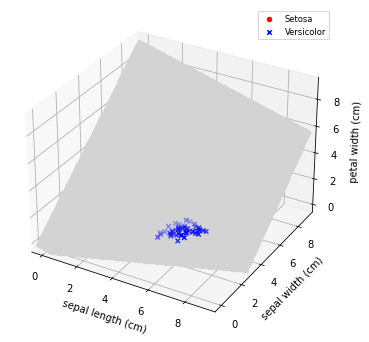

The loss function is : modified_huber
Score:  1.0
-------------------------

Features : sepal length (cm), petal length (cm), petal width (cm)
**********************


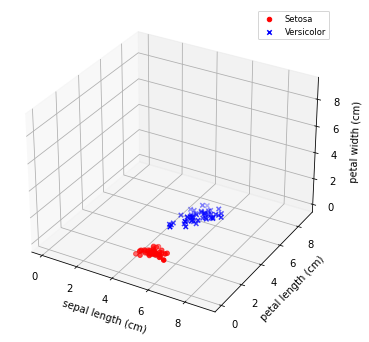

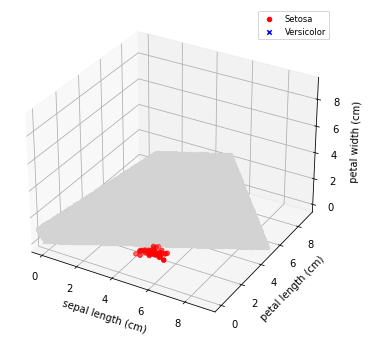

The loss function is : hinge
Score:  1.0
-------------------------


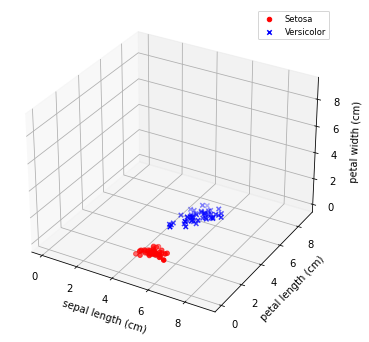

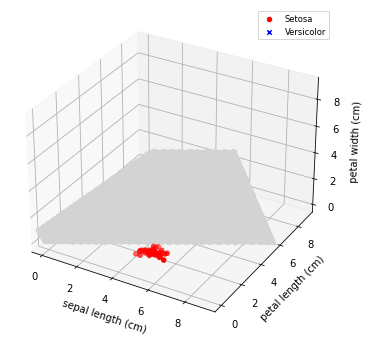

The loss function is : log
Score:  1.0
-------------------------


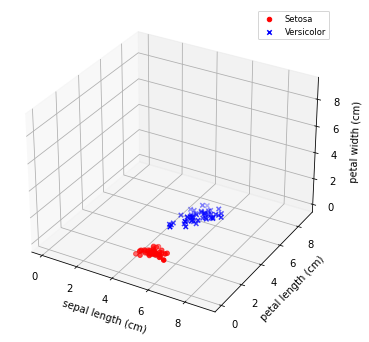

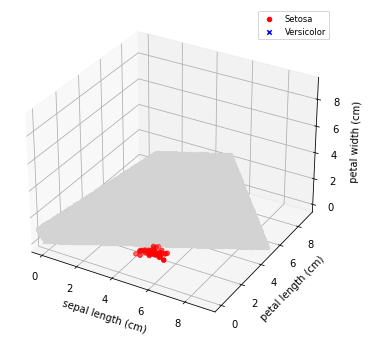

The loss function is : perceptron
Score:  1.0
-------------------------


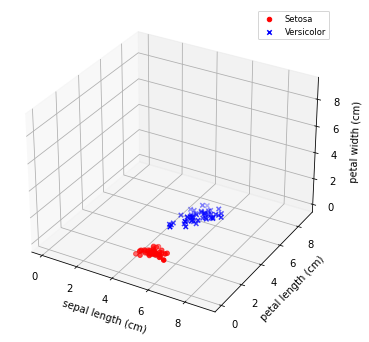

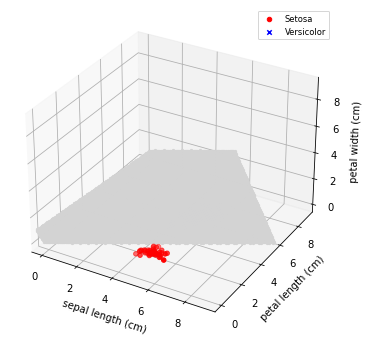

The loss function is : modified_huber
Score:  1.0
-------------------------

Features : sepal width (cm), petal length (cm), petal width (cm)
**********************


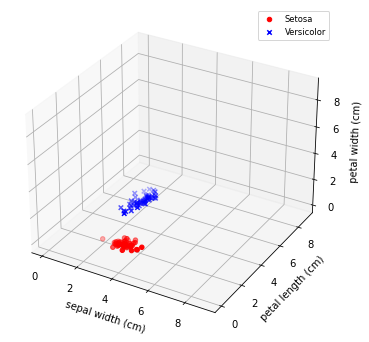

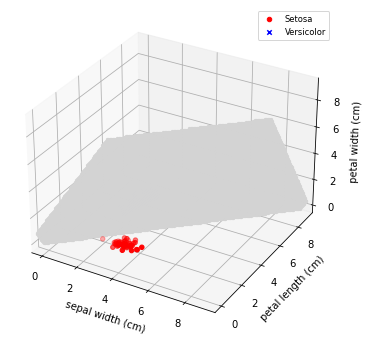

The loss function is : hinge
Score:  1.0
-------------------------


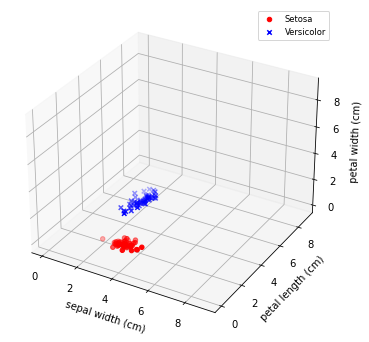

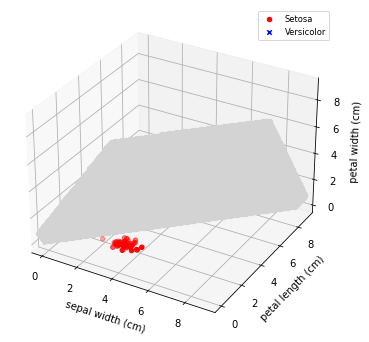

The loss function is : log
Score:  1.0
-------------------------


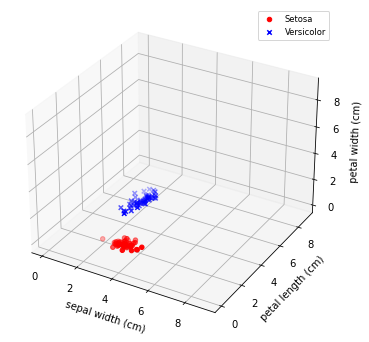

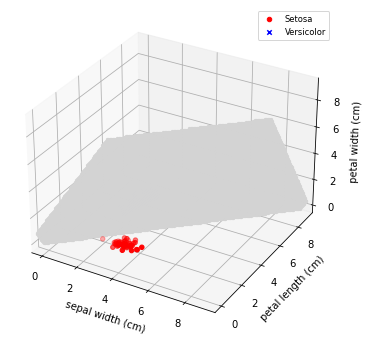

The loss function is : perceptron
Score:  1.0
-------------------------


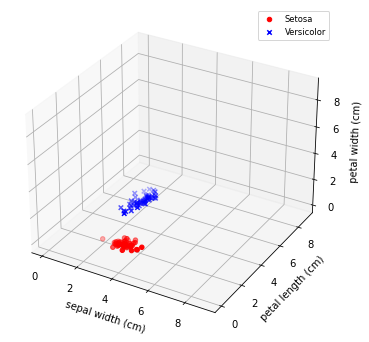

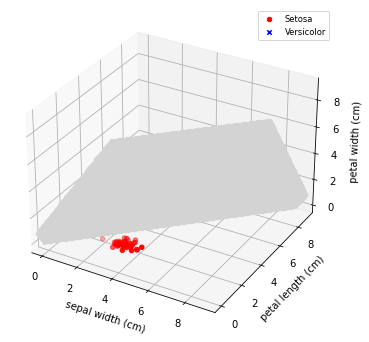

The loss function is : modified_huber
Score:  1.0
-------------------------

Features : sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)
**********************
The loss function is : hinge
Score:  1.0
-------------------------
The loss function is : log
Score:  1.0
-------------------------
The loss function is : perceptron
Score:  1.0
-------------------------
The loss function is : modified_huber
Score:  1.0
-------------------------


Classes : Setosa, Virginica
Features : sepal length (cm)
**********************


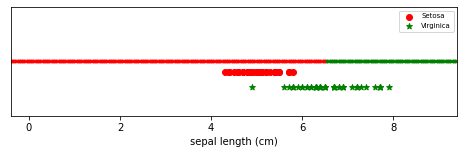

The loss function is : hinge
Score:  0.72
-------------------------


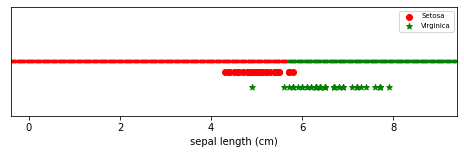

The loss function is : log
Score:  0.95
-------------------------


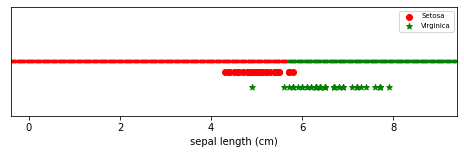

The loss function is : perceptron
Score:  0.95
-------------------------


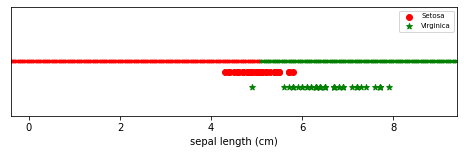

The loss function is : modified_huber
Score:  0.77
-------------------------

Features : sepal width (cm)
**********************


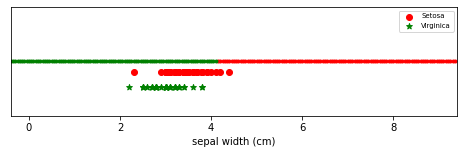

The loss function is : hinge
Score:  0.52
-------------------------


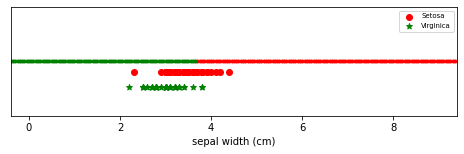

The loss function is : log
Score:  0.61
-------------------------


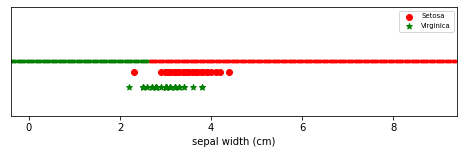

The loss function is : perceptron
Score:  0.56
-------------------------


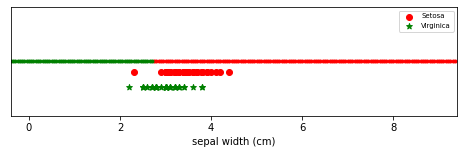

The loss function is : modified_huber
Score:  0.6
-------------------------

Features : petal length (cm)
**********************


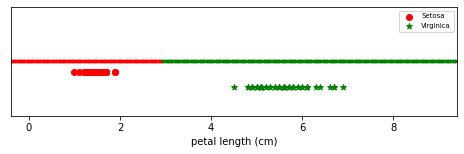

The loss function is : hinge
Score:  1.0
-------------------------


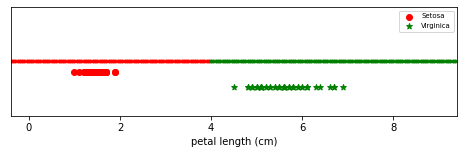

The loss function is : log
Score:  1.0
-------------------------


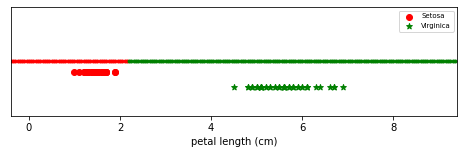

The loss function is : perceptron
Score:  1.0
-------------------------


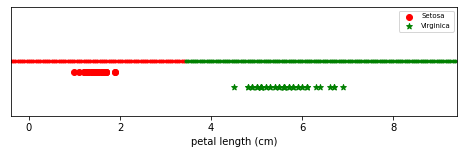

The loss function is : modified_huber
Score:  1.0
-------------------------

Features : petal width (cm)
**********************


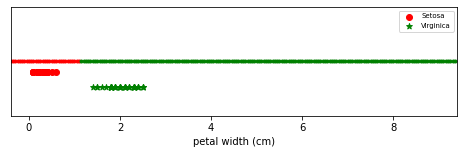

The loss function is : hinge
Score:  1.0
-------------------------


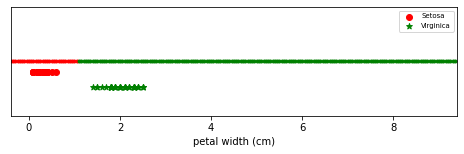

The loss function is : log
Score:  1.0
-------------------------


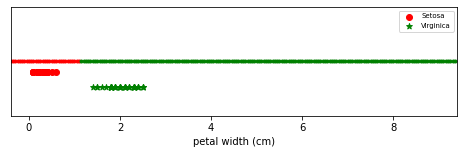

The loss function is : perceptron
Score:  1.0
-------------------------


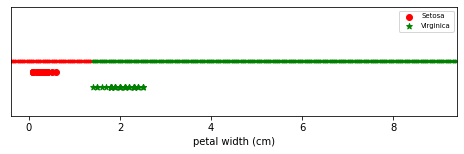

The loss function is : modified_huber
Score:  1.0
-------------------------

Features : sepal length (cm), sepal width (cm)
**********************


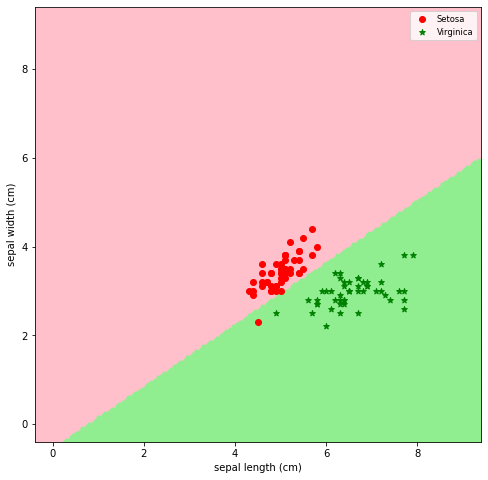

The loss function is : hinge
Score:  0.99
-------------------------


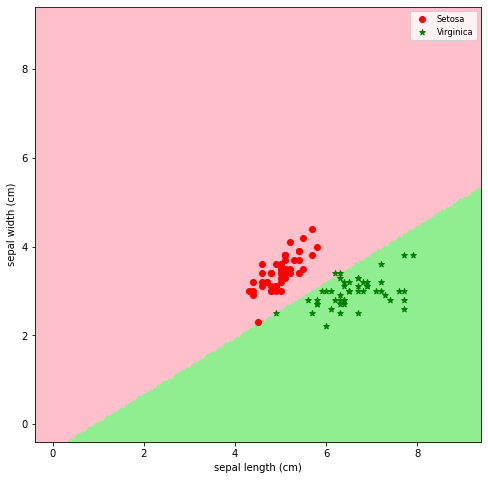

The loss function is : log
Score:  0.97
-------------------------


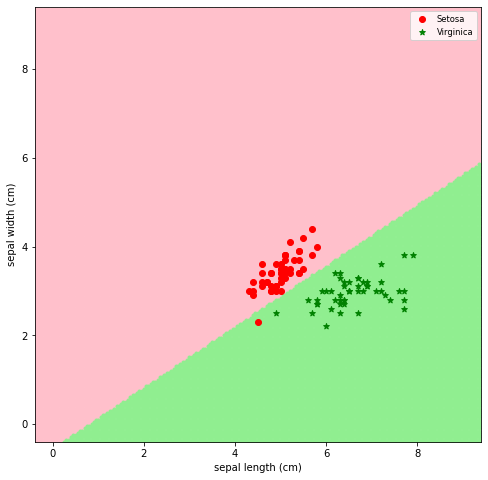

The loss function is : perceptron
Score:  0.99
-------------------------


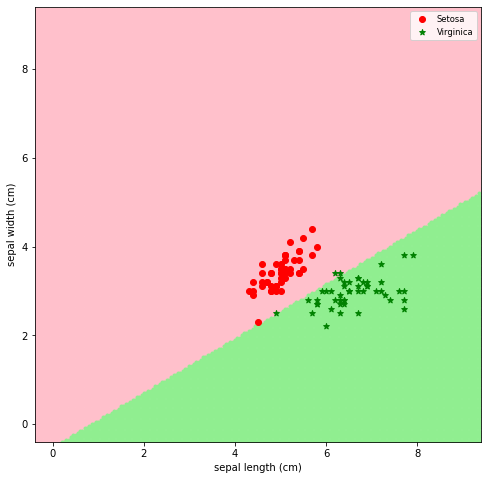

The loss function is : modified_huber
Score:  0.97
-------------------------

Features : sepal length (cm), petal length (cm)
**********************


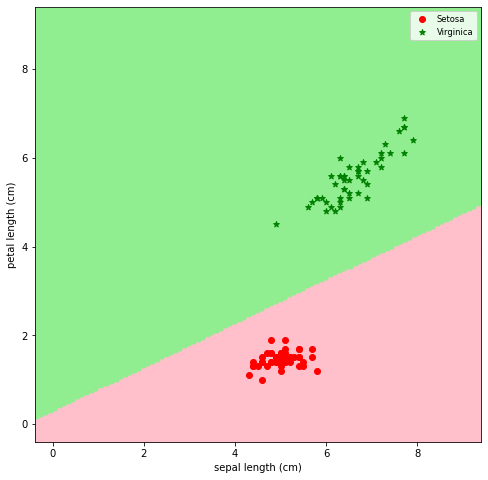

The loss function is : hinge
Score:  1.0
-------------------------


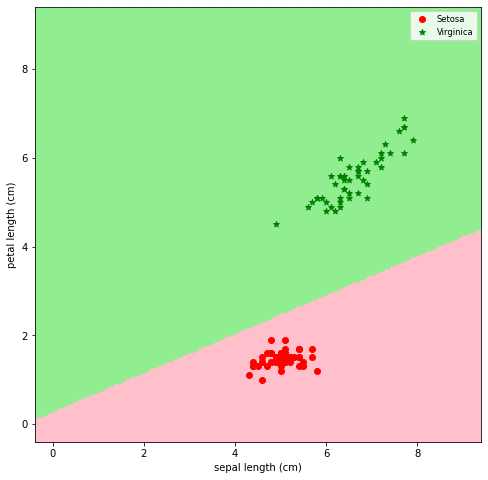

The loss function is : log
Score:  1.0
-------------------------


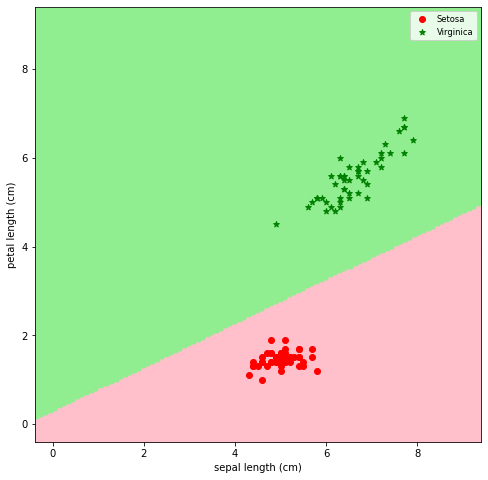

The loss function is : perceptron
Score:  1.0
-------------------------


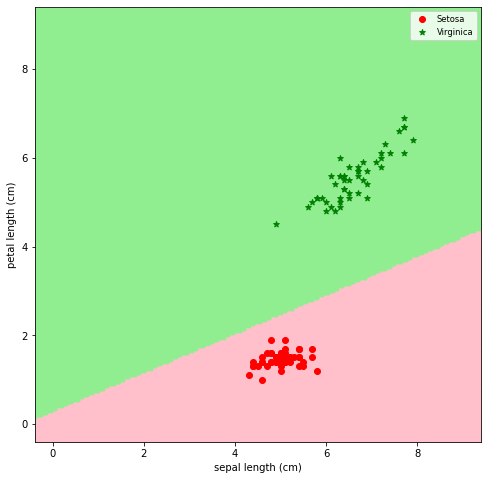

The loss function is : modified_huber
Score:  1.0
-------------------------

Features : sepal length (cm), petal width (cm)
**********************


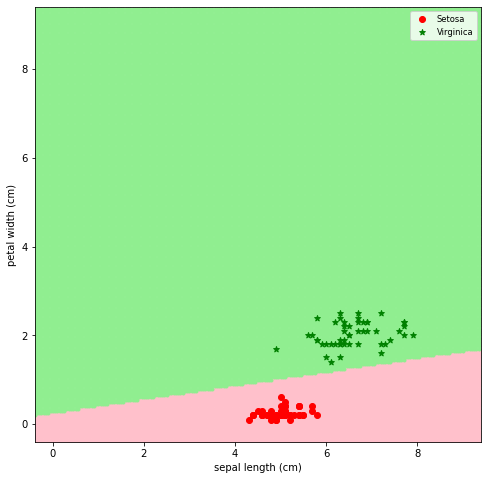

The loss function is : hinge
Score:  1.0
-------------------------


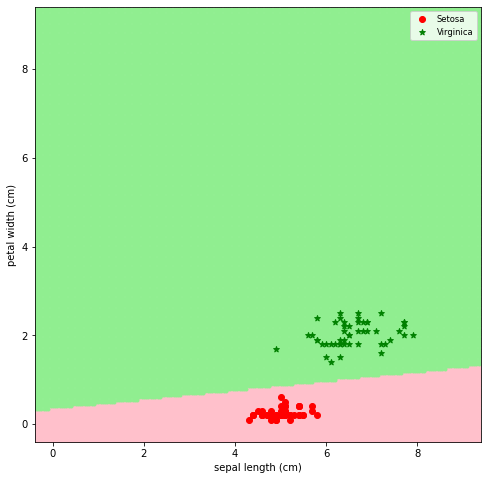

The loss function is : log
Score:  1.0
-------------------------


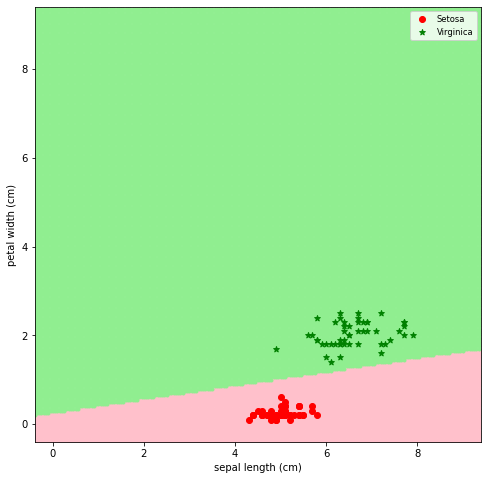

The loss function is : perceptron
Score:  1.0
-------------------------


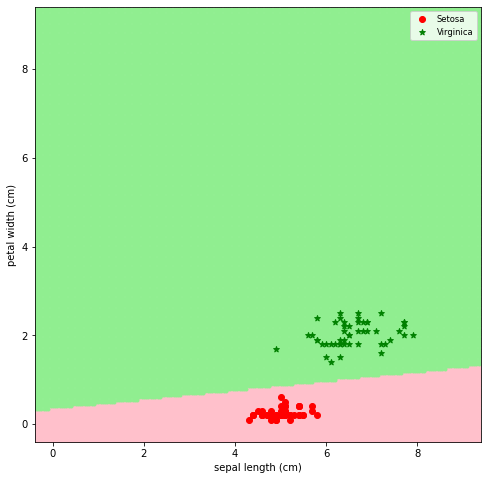

The loss function is : modified_huber
Score:  1.0
-------------------------

Features : sepal width (cm), petal length (cm)
**********************


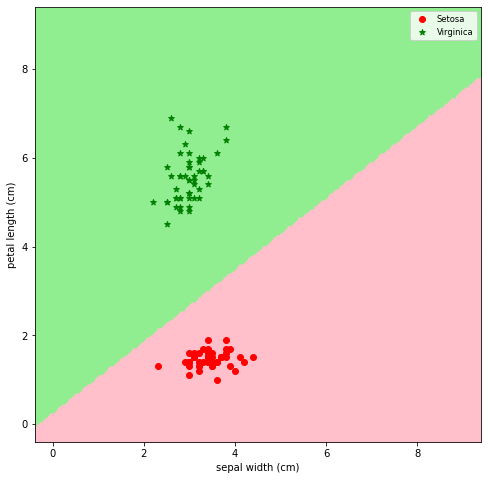

The loss function is : hinge
Score:  1.0
-------------------------


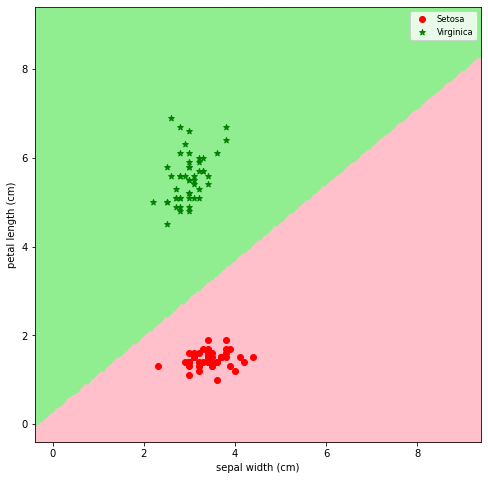

The loss function is : log
Score:  1.0
-------------------------


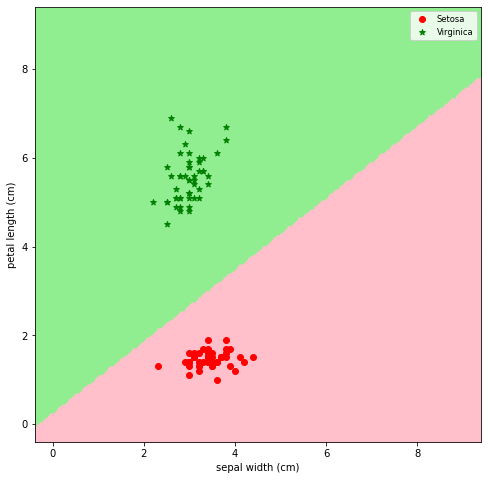

The loss function is : perceptron
Score:  1.0
-------------------------


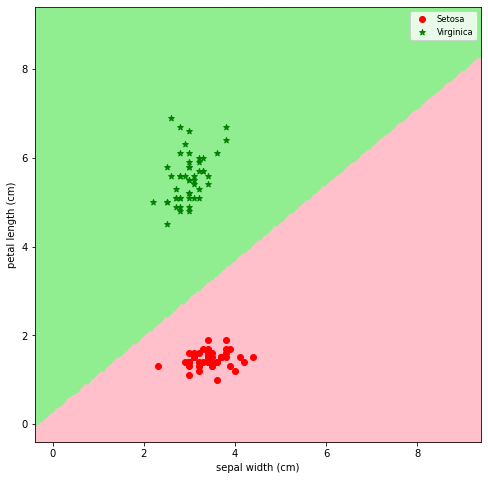

The loss function is : modified_huber
Score:  1.0
-------------------------

Features : sepal width (cm), petal width (cm)
**********************


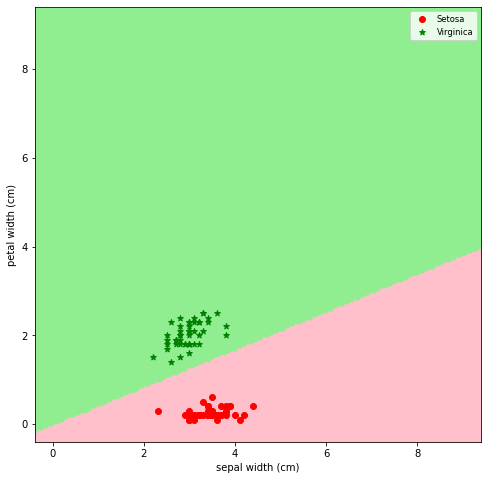

The loss function is : hinge
Score:  1.0
-------------------------


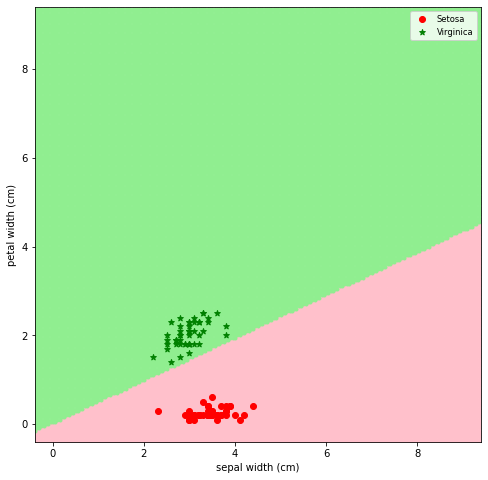

The loss function is : log
Score:  1.0
-------------------------


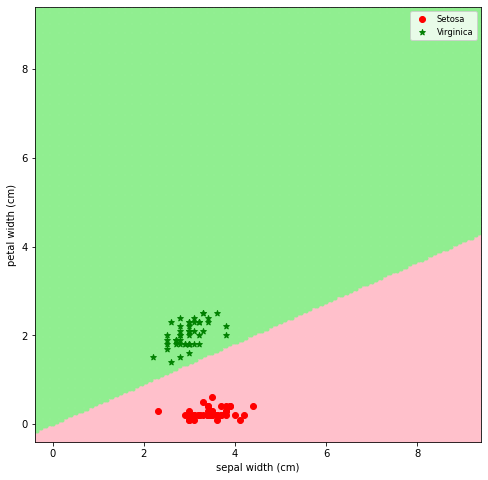

The loss function is : perceptron
Score:  1.0
-------------------------


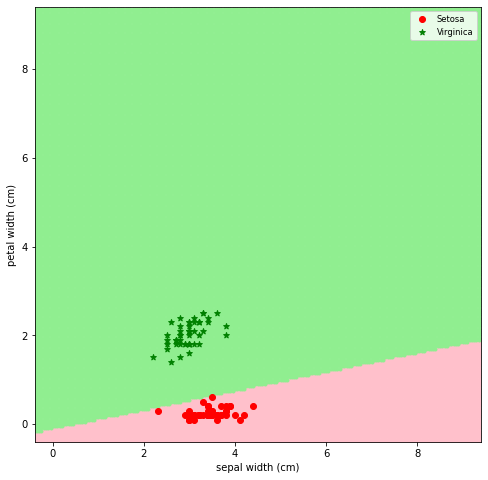

The loss function is : modified_huber
Score:  1.0
-------------------------

Features : petal length (cm), petal width (cm)
**********************


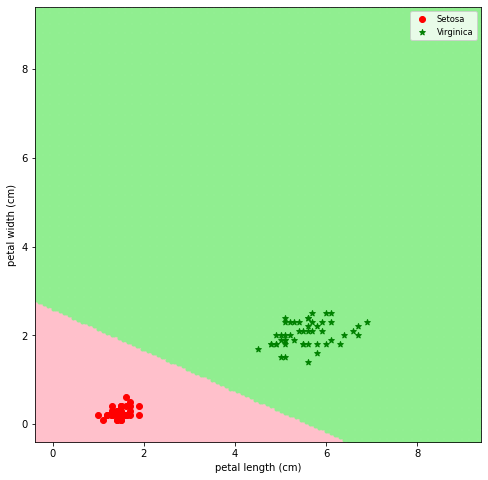

The loss function is : hinge
Score:  1.0
-------------------------


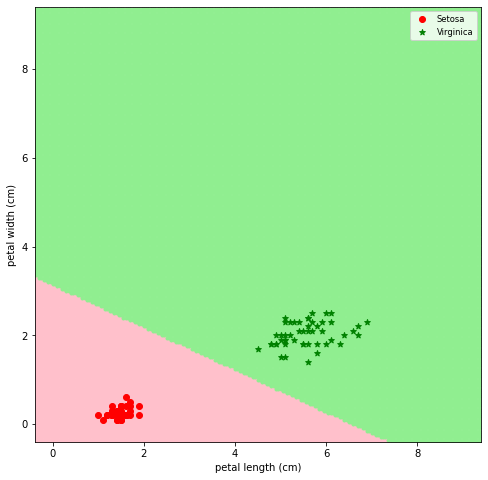

The loss function is : log
Score:  1.0
-------------------------


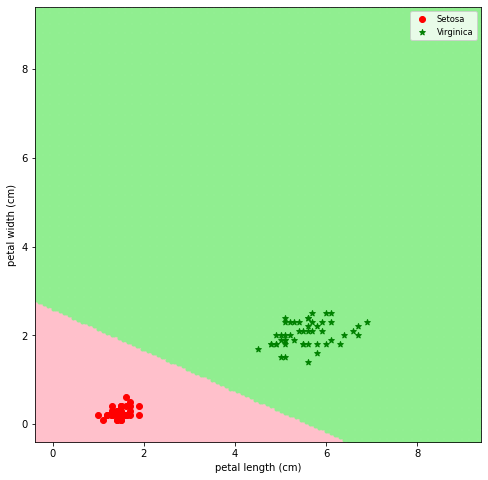

The loss function is : perceptron
Score:  1.0
-------------------------


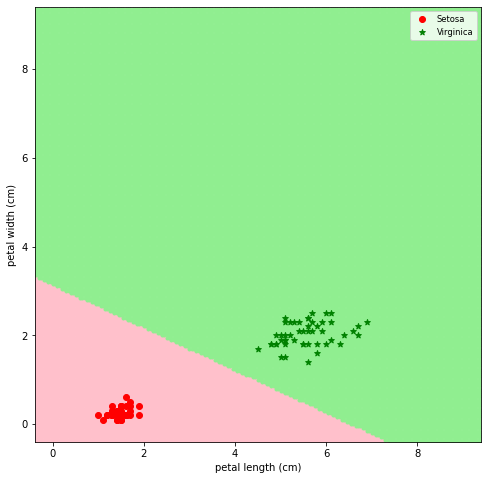

The loss function is : modified_huber
Score:  1.0
-------------------------

Features : sepal length (cm), sepal width (cm), petal length (cm)
**********************


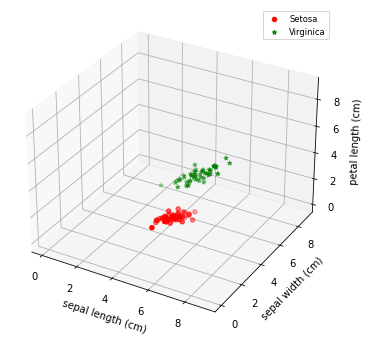

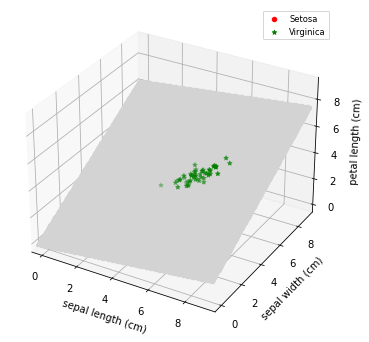

The loss function is : hinge
Score:  1.0
-------------------------


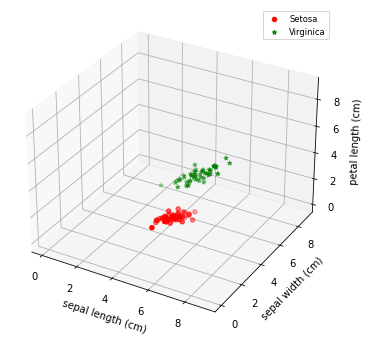

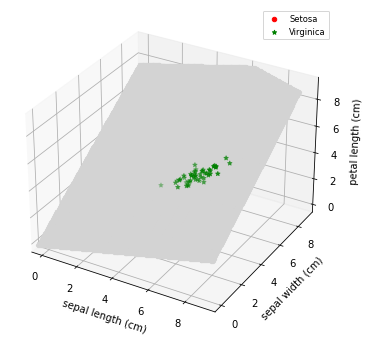

The loss function is : log
Score:  1.0
-------------------------


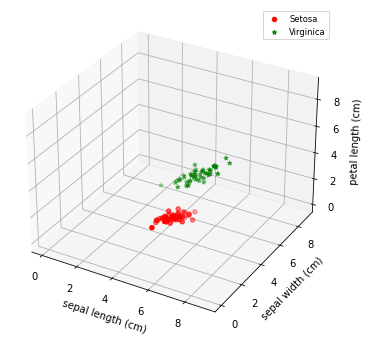

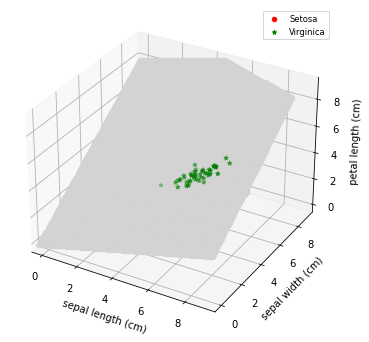

The loss function is : perceptron
Score:  1.0
-------------------------


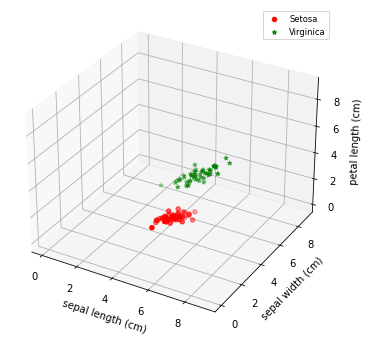

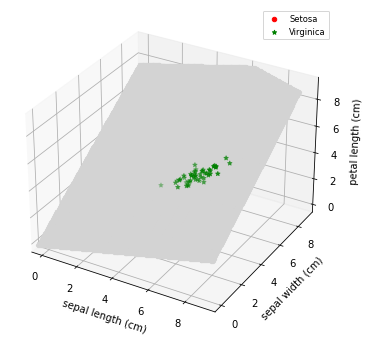

The loss function is : modified_huber
Score:  1.0
-------------------------

Features : sepal length (cm), sepal width (cm), petal width (cm)
**********************


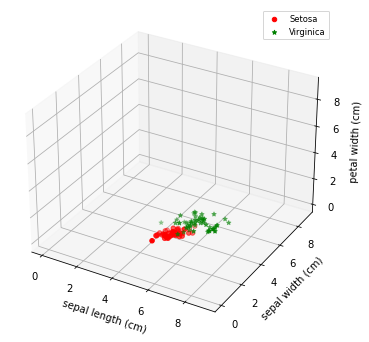

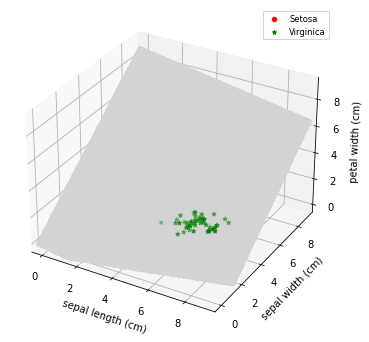

The loss function is : hinge
Score:  1.0
-------------------------


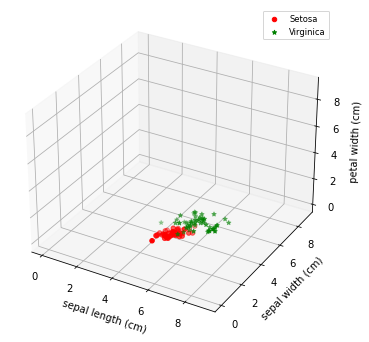

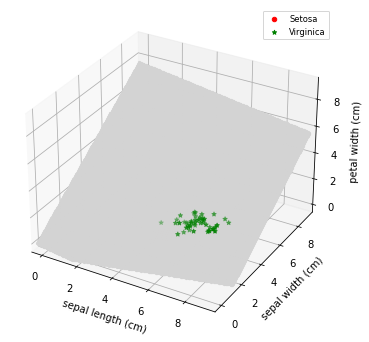

The loss function is : log
Score:  1.0
-------------------------


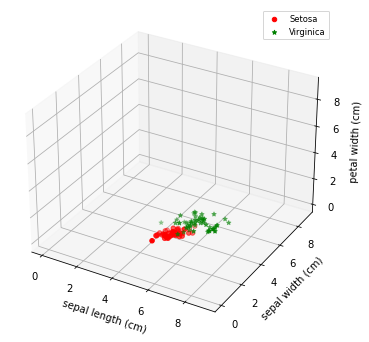

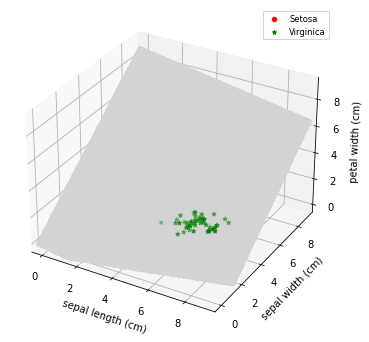

The loss function is : perceptron
Score:  1.0
-------------------------


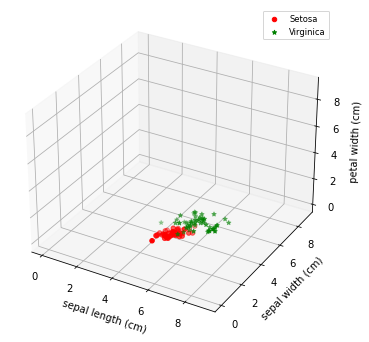

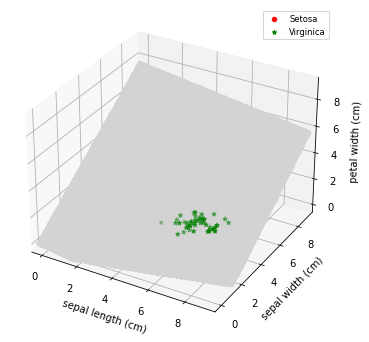

The loss function is : modified_huber
Score:  1.0
-------------------------

Features : sepal length (cm), petal length (cm), petal width (cm)
**********************


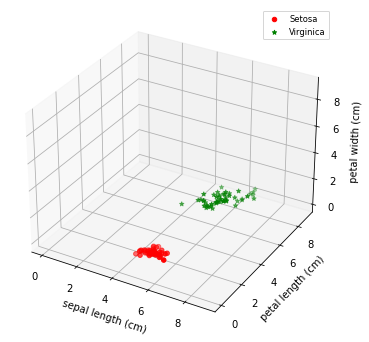

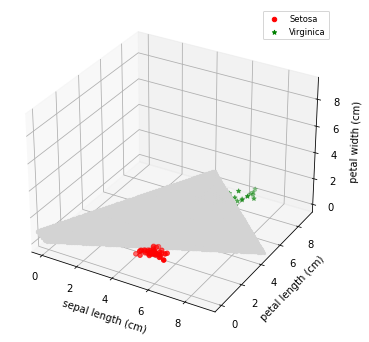

The loss function is : hinge
Score:  1.0
-------------------------


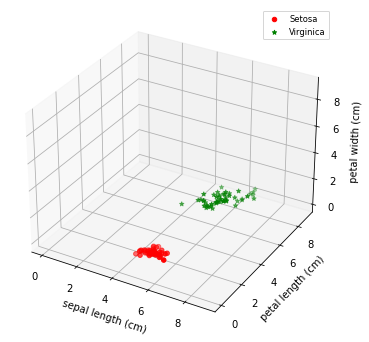

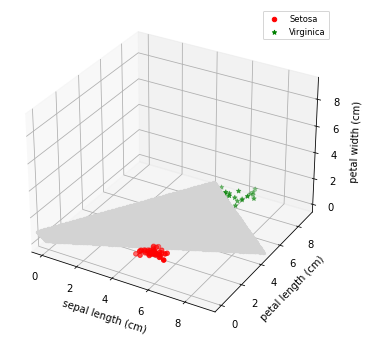

The loss function is : log
Score:  1.0
-------------------------


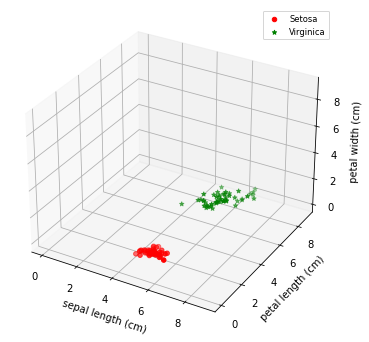

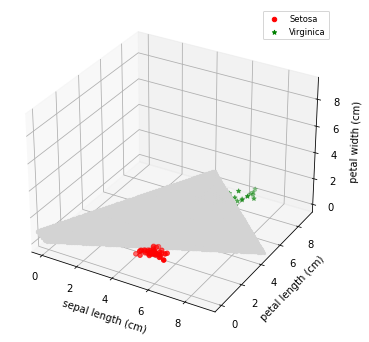

The loss function is : perceptron
Score:  1.0
-------------------------


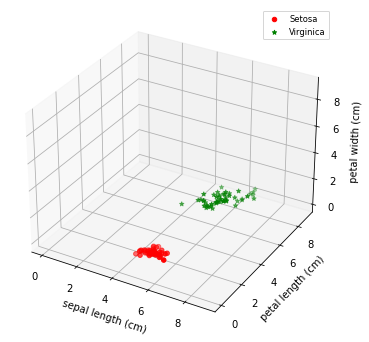

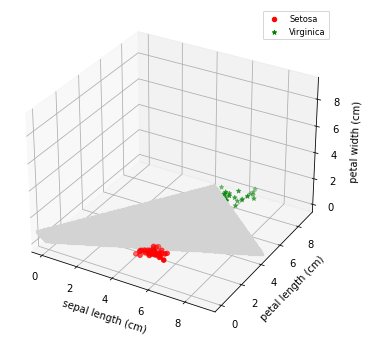

The loss function is : modified_huber
Score:  1.0
-------------------------

Features : sepal width (cm), petal length (cm), petal width (cm)
**********************


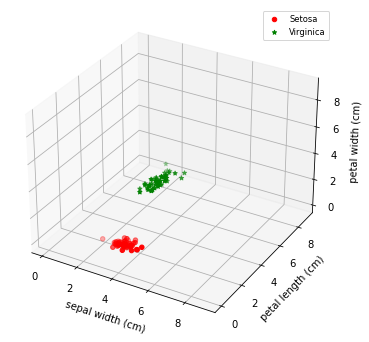

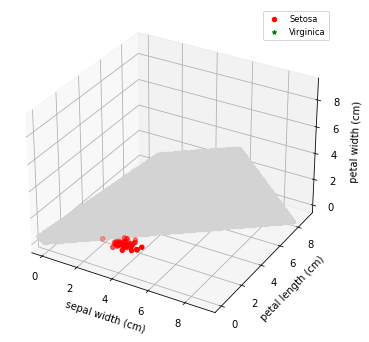

The loss function is : hinge
Score:  1.0
-------------------------


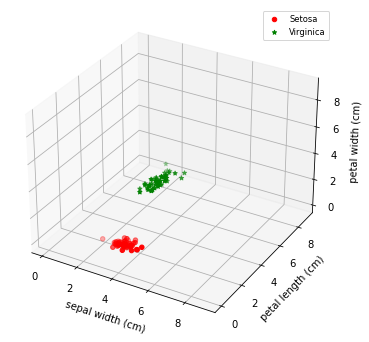

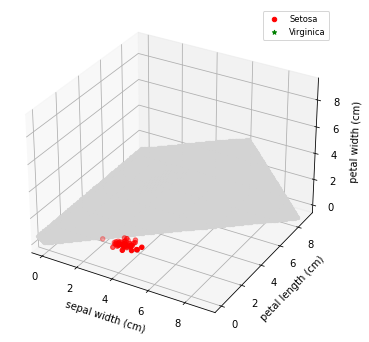

The loss function is : log
Score:  1.0
-------------------------


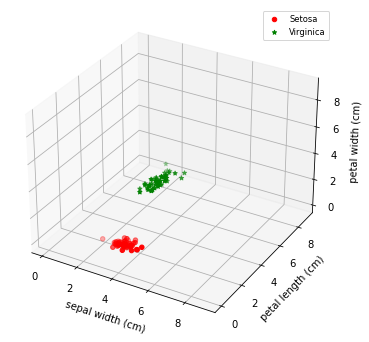

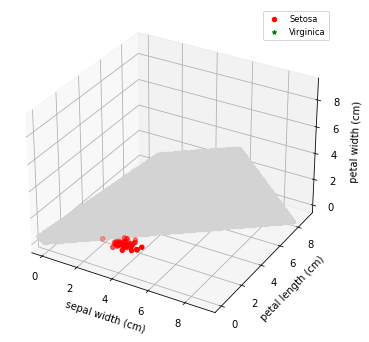

The loss function is : perceptron
Score:  1.0
-------------------------


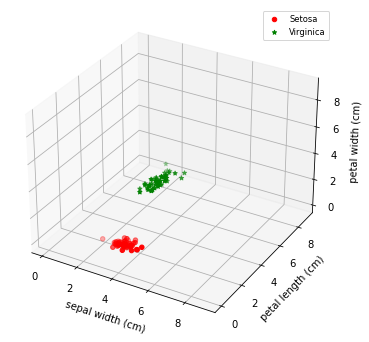

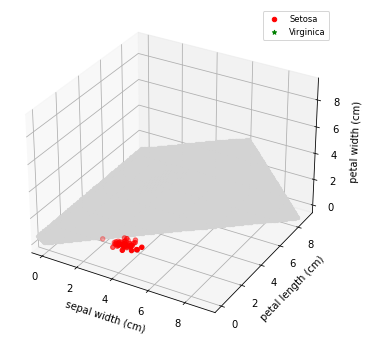

The loss function is : modified_huber
Score:  1.0
-------------------------

Features : sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)
**********************
The loss function is : hinge
Score:  1.0
-------------------------
The loss function is : log
Score:  1.0
-------------------------
The loss function is : perceptron
Score:  1.0
-------------------------
The loss function is : modified_huber
Score:  1.0
-------------------------


Classes : Versicolor, Virginica
Features : sepal length (cm)
**********************


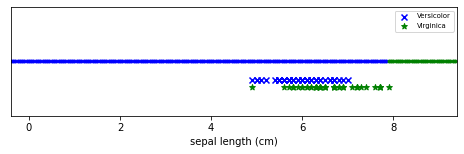

The loss function is : hinge
Score:  0.51
-------------------------


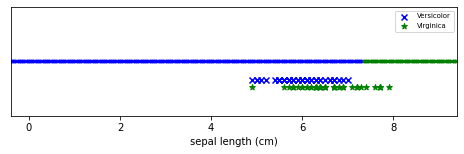

The loss function is : log
Score:  0.57
-------------------------


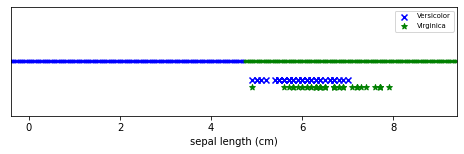

The loss function is : perceptron
Score:  0.5
-------------------------


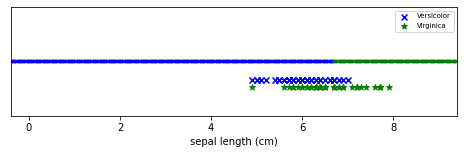

The loss function is : modified_huber
Score:  0.66
-------------------------

Features : sepal width (cm)
**********************


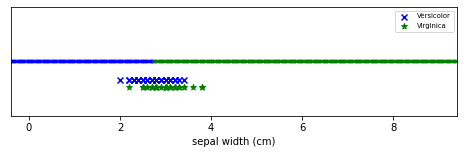

The loss function is : hinge
Score:  0.6
-------------------------


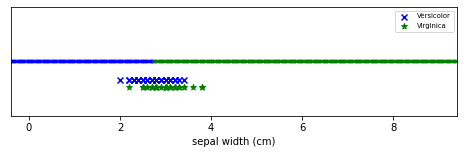

The loss function is : log
Score:  0.6
-------------------------


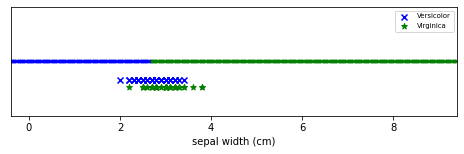

The loss function is : perceptron
Score:  0.59
-------------------------


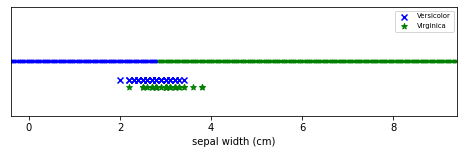

The loss function is : modified_huber
Score:  0.58
-------------------------

Features : petal length (cm)
**********************


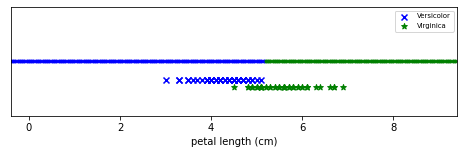

The loss function is : hinge
Score:  0.84
-------------------------


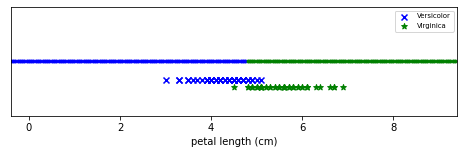

The loss function is : log
Score:  0.93
-------------------------


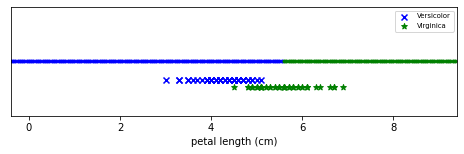

The loss function is : perceptron
Score:  0.75
-------------------------


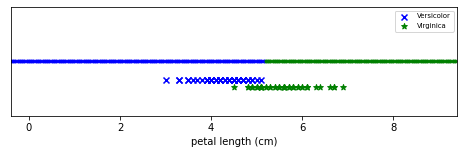

The loss function is : modified_huber
Score:  0.84
-------------------------

Features : petal width (cm)
**********************


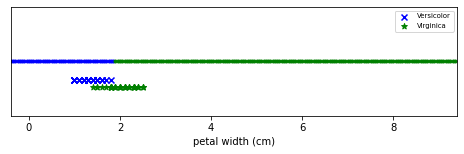

The loss function is : hinge
Score:  0.84
-------------------------


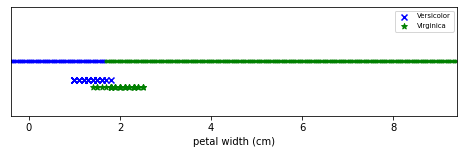

The loss function is : log
Score:  0.94
-------------------------


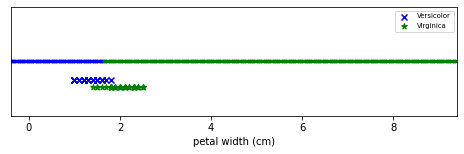

The loss function is : perceptron
Score:  0.94
-------------------------


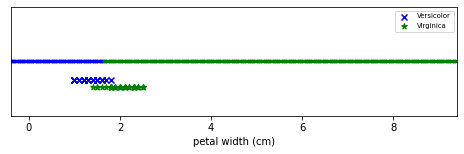

The loss function is : modified_huber
Score:  0.94
-------------------------

Features : sepal length (cm), sepal width (cm)
**********************


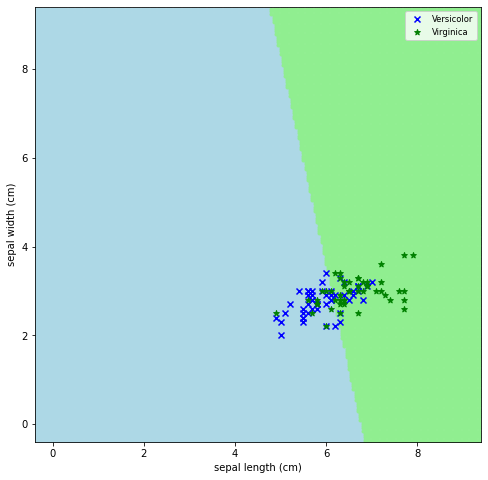

The loss function is : hinge
Score:  0.74
-------------------------


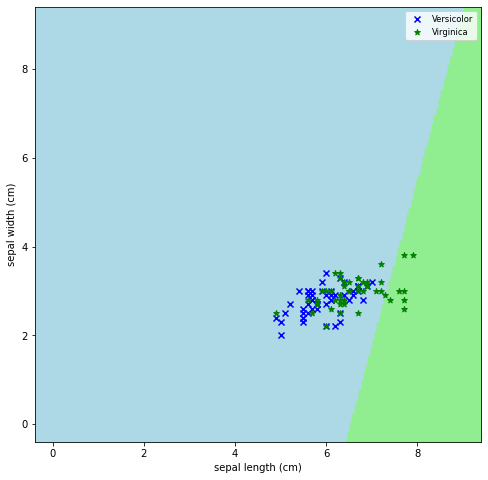

The loss function is : log
Score:  0.57
-------------------------


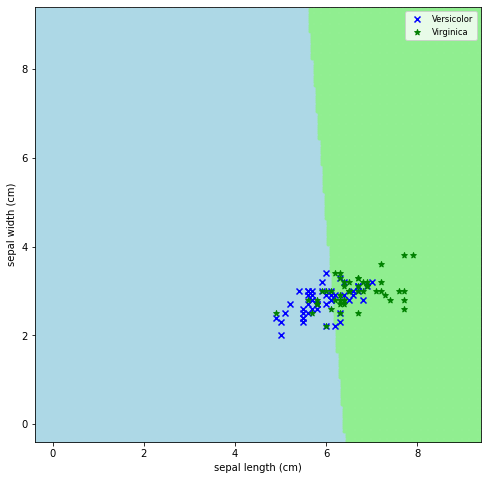

The loss function is : perceptron
Score:  0.74
-------------------------


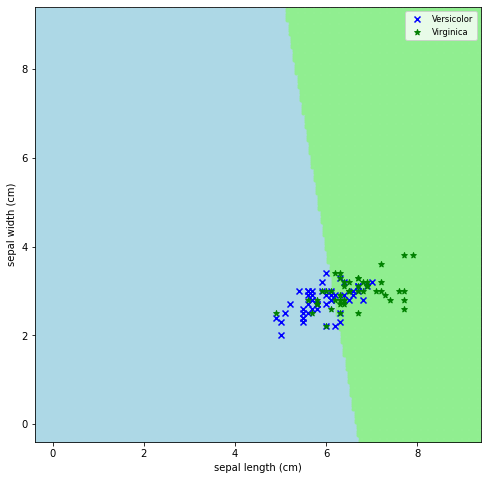

The loss function is : modified_huber
Score:  0.74
-------------------------

Features : sepal length (cm), petal length (cm)
**********************


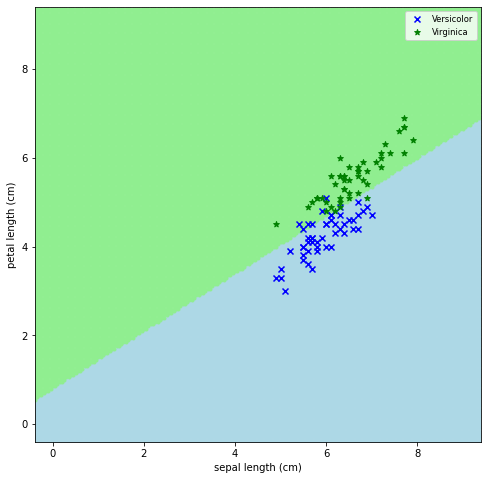

The loss function is : hinge
Score:  0.92
-------------------------


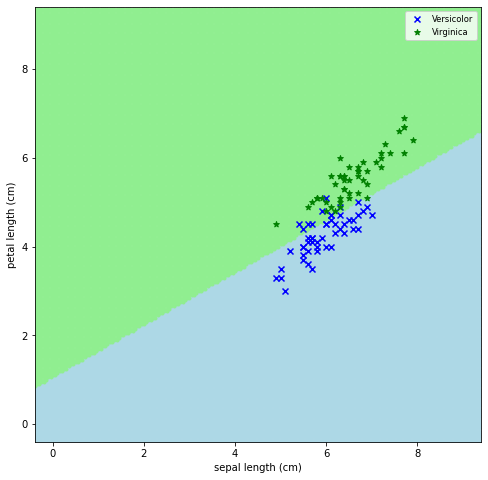

The loss function is : log
Score:  0.9
-------------------------


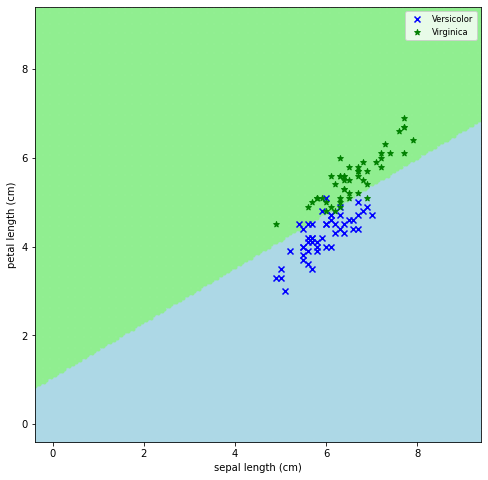

The loss function is : perceptron
Score:  0.94
-------------------------


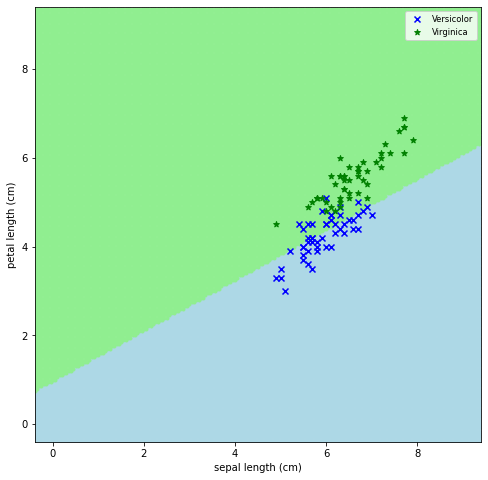

The loss function is : modified_huber
Score:  0.83
-------------------------

Features : sepal length (cm), petal width (cm)
**********************


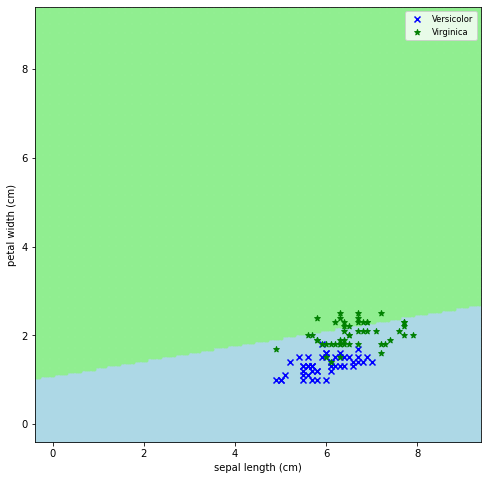

The loss function is : hinge
Score:  0.63
-------------------------


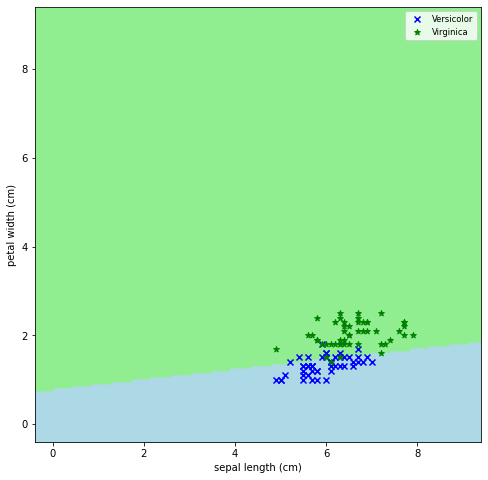

The loss function is : log
Score:  0.88
-------------------------


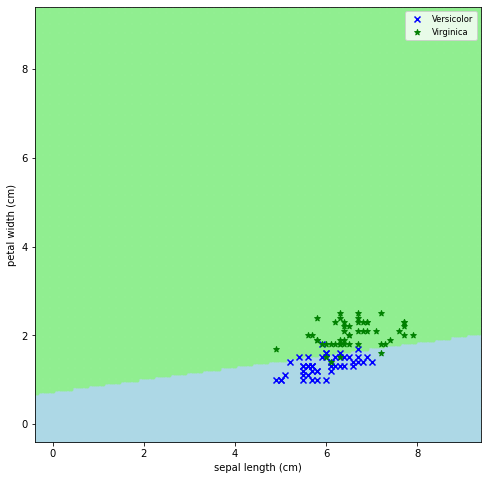

The loss function is : perceptron
Score:  0.91
-------------------------


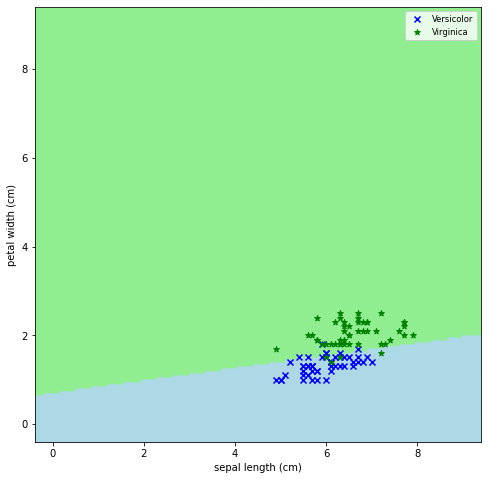

The loss function is : modified_huber
Score:  0.91
-------------------------

Features : sepal width (cm), petal length (cm)
**********************


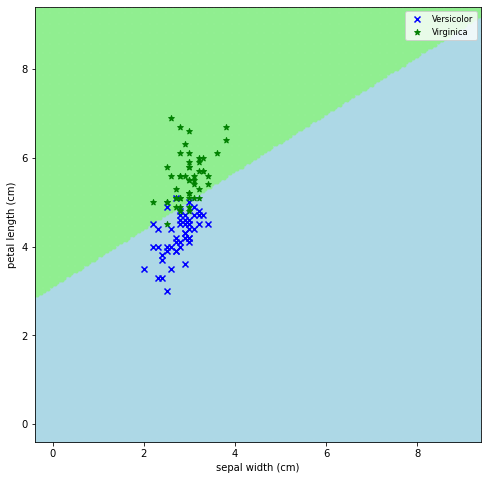

The loss function is : hinge
Score:  0.91
-------------------------


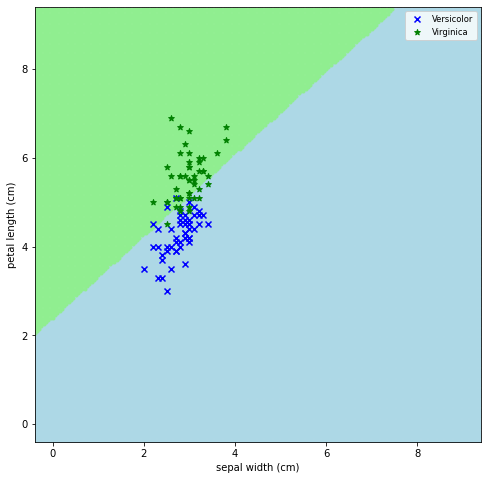

The loss function is : log
Score:  0.86
-------------------------


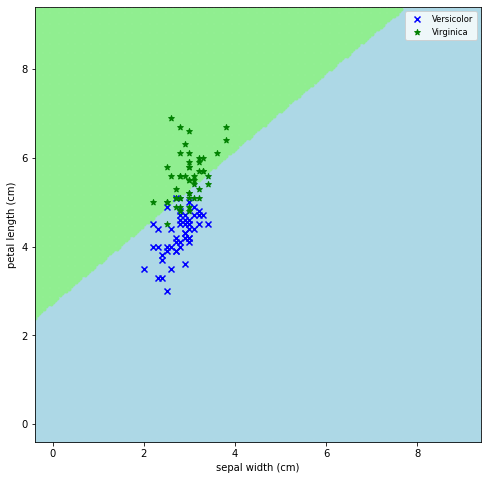

The loss function is : perceptron
Score:  0.81
-------------------------


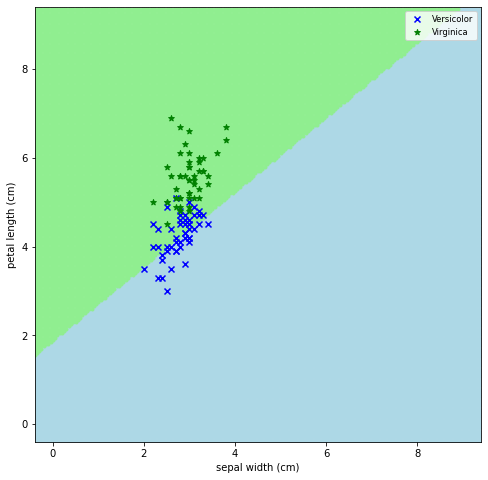

The loss function is : modified_huber
Score:  0.74
-------------------------

Features : sepal width (cm), petal width (cm)
**********************


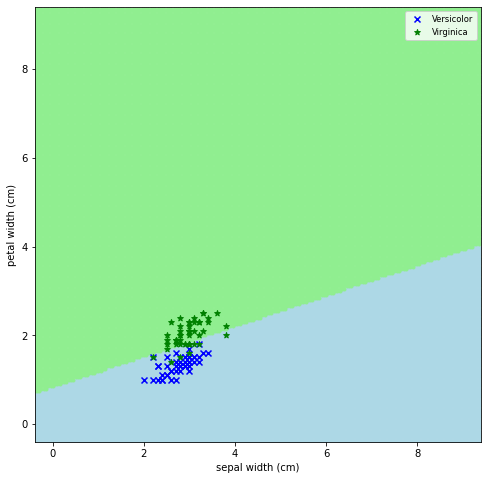

The loss function is : hinge
Score:  0.87
-------------------------


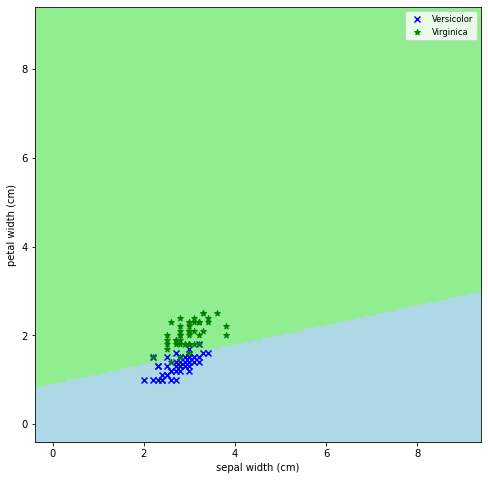

The loss function is : log
Score:  0.92
-------------------------


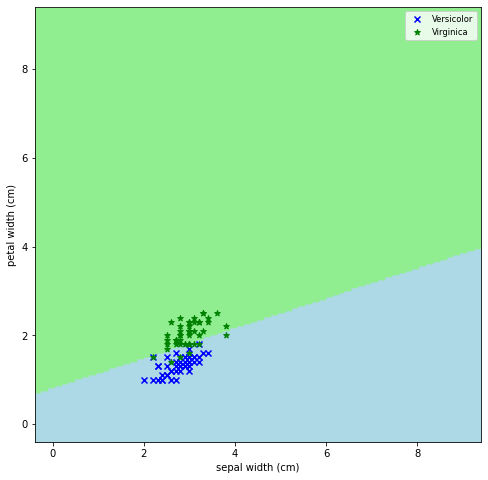

The loss function is : perceptron
Score:  0.87
-------------------------


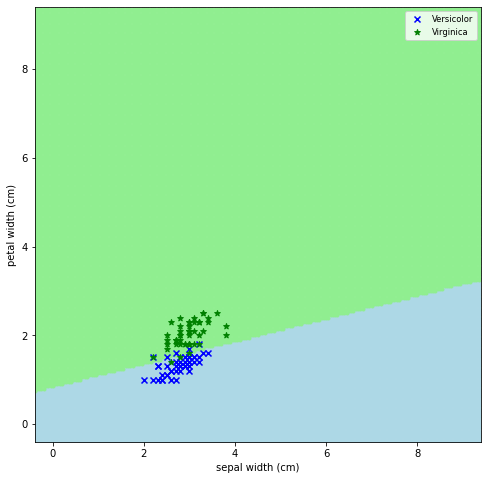

The loss function is : modified_huber
Score:  0.92
-------------------------

Features : petal length (cm), petal width (cm)
**********************


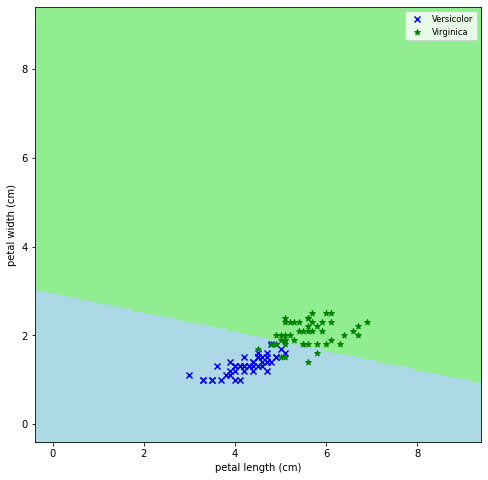

The loss function is : hinge
Score:  0.9
-------------------------


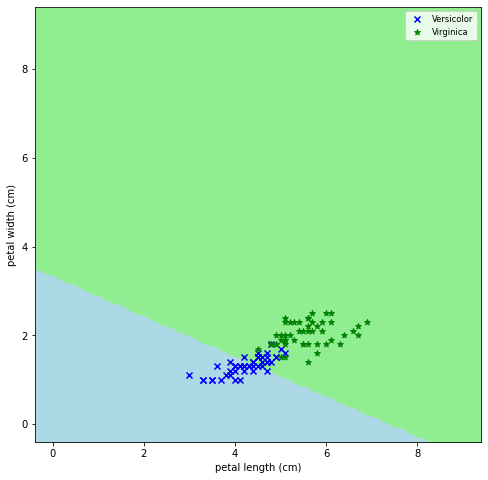

The loss function is : log
Score:  0.78
-------------------------


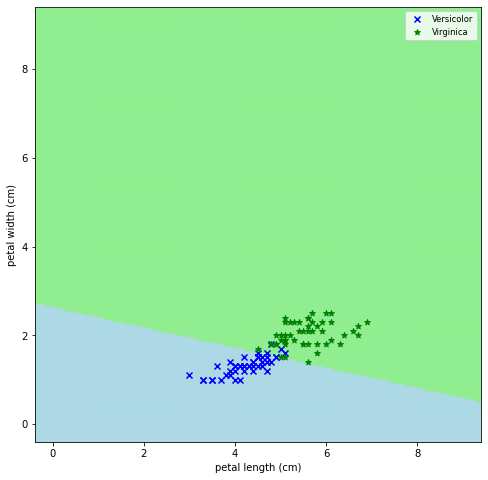

The loss function is : perceptron
Score:  0.95
-------------------------


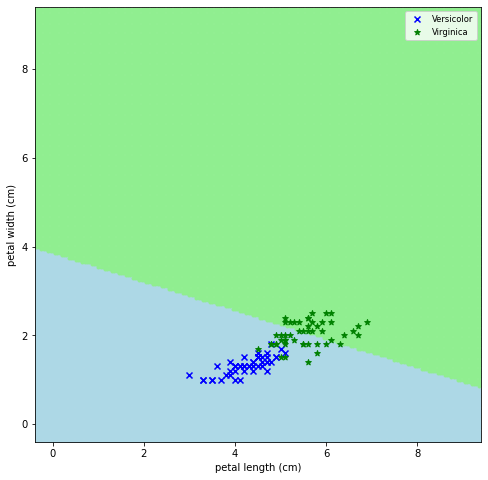

The loss function is : modified_huber
Score:  0.75
-------------------------

Features : sepal length (cm), sepal width (cm), petal length (cm)
**********************


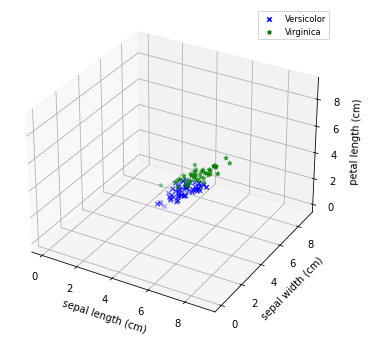

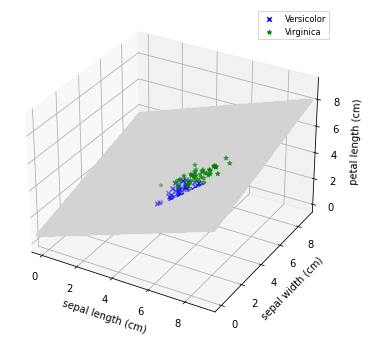

The loss function is : hinge
Score:  0.89
-------------------------


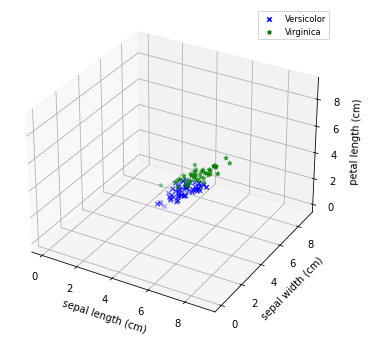

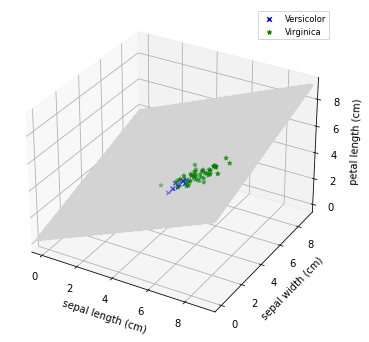

The loss function is : log
Score:  0.86
-------------------------


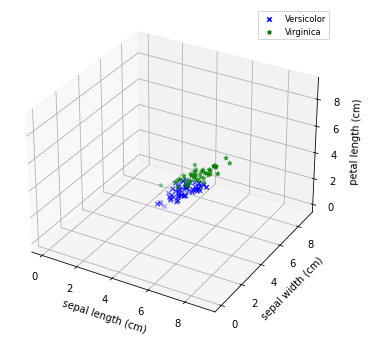

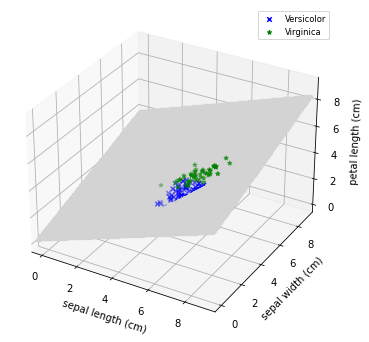

The loss function is : perceptron
Score:  0.87
-------------------------


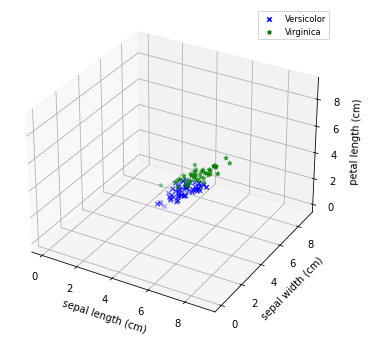

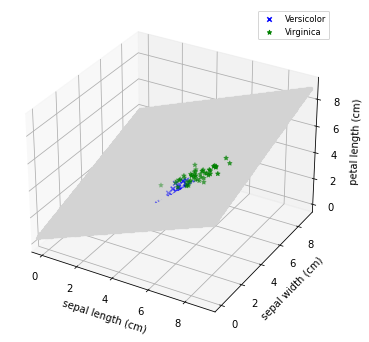

The loss function is : modified_huber
Score:  0.9
-------------------------

Features : sepal length (cm), sepal width (cm), petal width (cm)
**********************


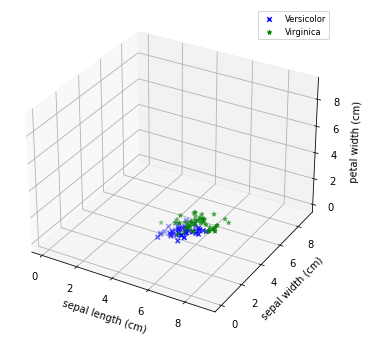

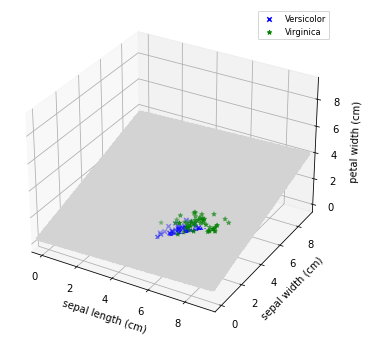

The loss function is : hinge
Score:  0.91
-------------------------


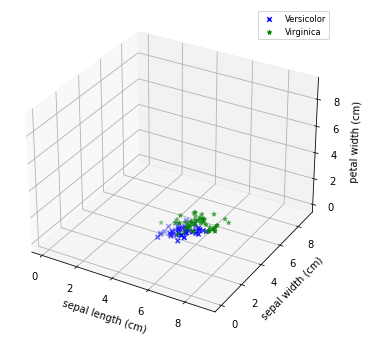

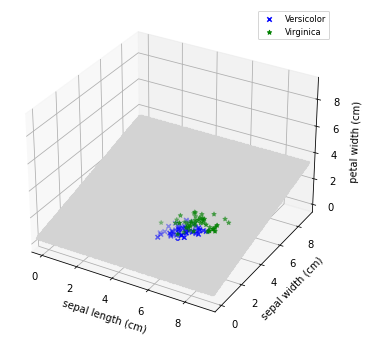

The loss function is : log
Score:  0.81
-------------------------


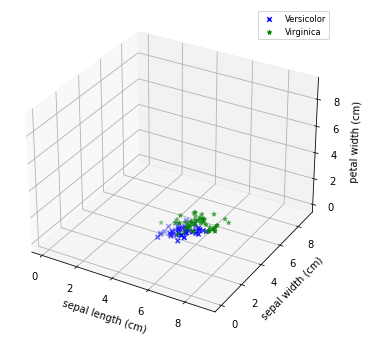

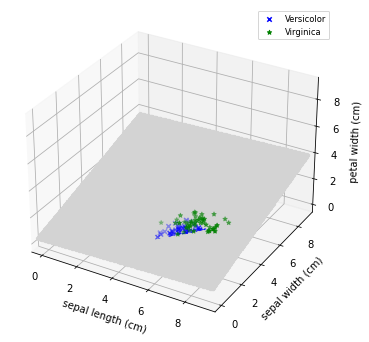

The loss function is : perceptron
Score:  0.95
-------------------------


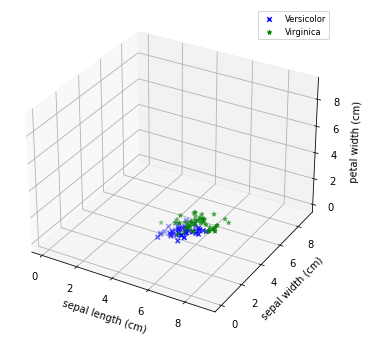

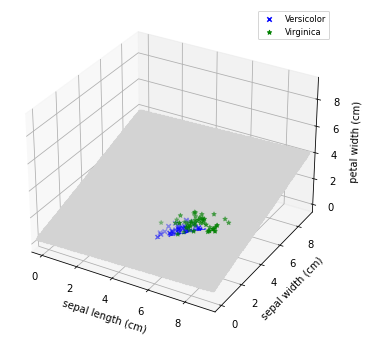

The loss function is : modified_huber
Score:  0.93
-------------------------

Features : sepal length (cm), petal length (cm), petal width (cm)
**********************


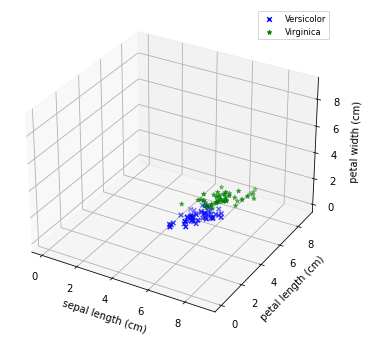

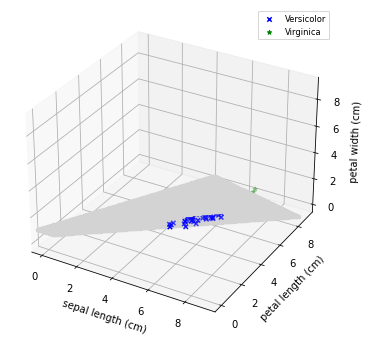

The loss function is : hinge
Score:  0.75
-------------------------


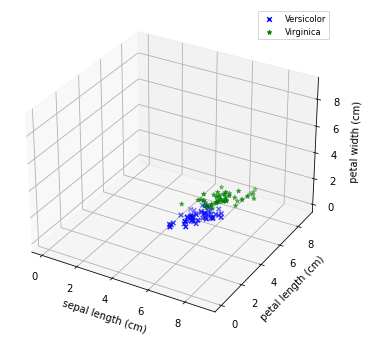

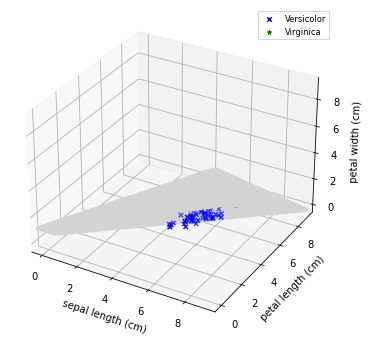

The loss function is : log
Score:  0.96
-------------------------


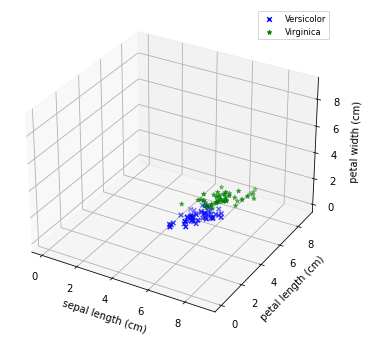

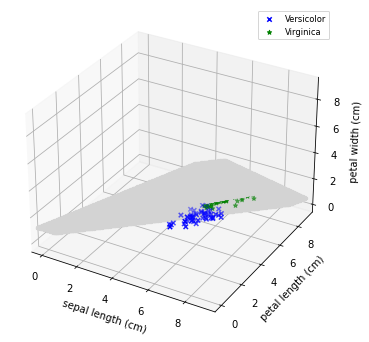

The loss function is : perceptron
Score:  0.85
-------------------------


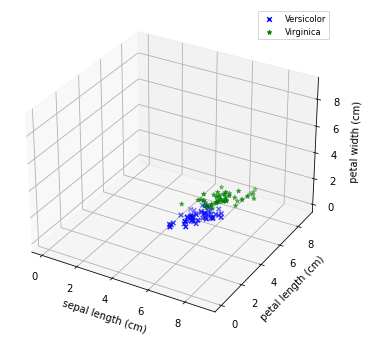

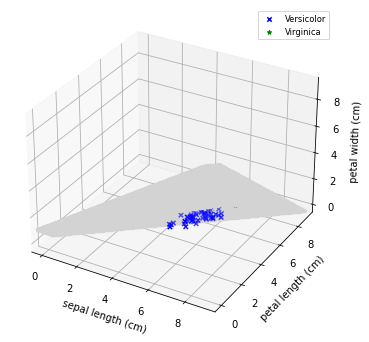

The loss function is : modified_huber
Score:  0.95
-------------------------

Features : sepal width (cm), petal length (cm), petal width (cm)
**********************


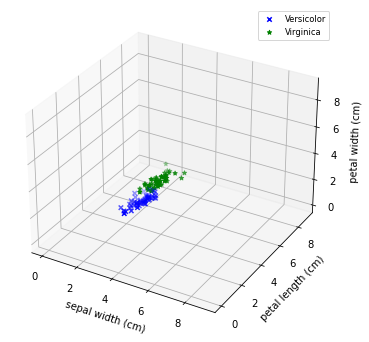

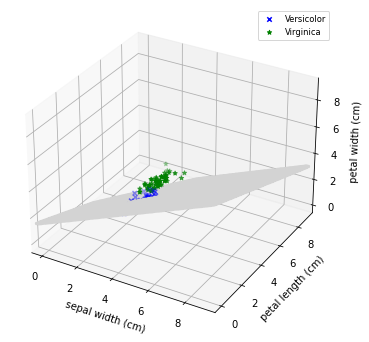

The loss function is : hinge
Score:  0.9
-------------------------


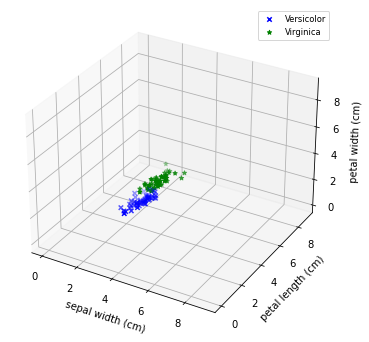

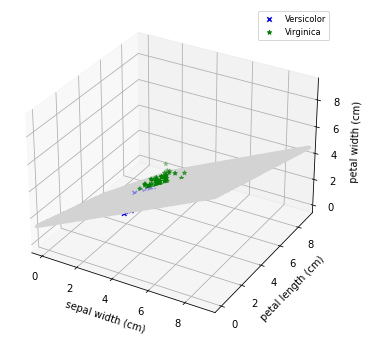

The loss function is : log
Score:  0.9
-------------------------


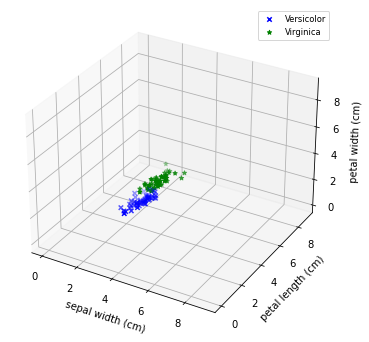

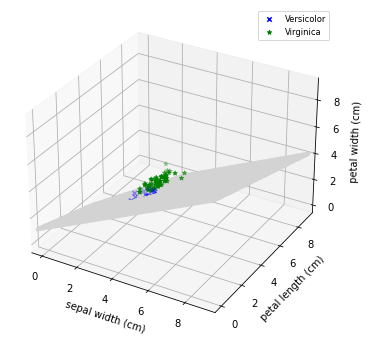

The loss function is : perceptron
Score:  0.94
-------------------------


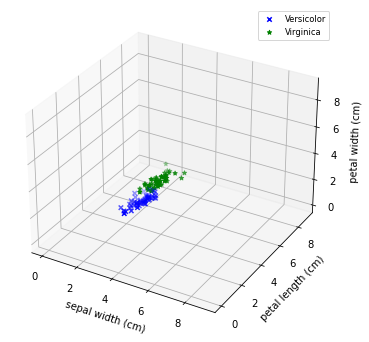

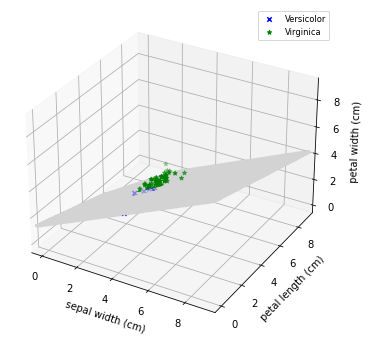

The loss function is : modified_huber
Score:  0.95
-------------------------

Features : sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)
**********************
The loss function is : hinge
Score:  0.83
-------------------------
The loss function is : log
Score:  0.9
-------------------------
The loss function is : perceptron
Score:  0.83
-------------------------
The loss function is : modified_huber
Score:  0.96
-------------------------


Classes : Setosa, Versicolor, Virginica
Features : sepal length (cm)
**********************


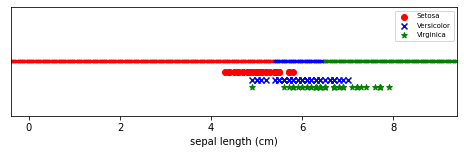

The loss function is : hinge
Score:  0.68
-------------------------


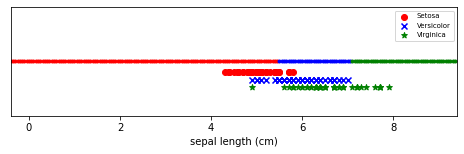

The loss function is : log
Score:  0.6733333333333333
-------------------------


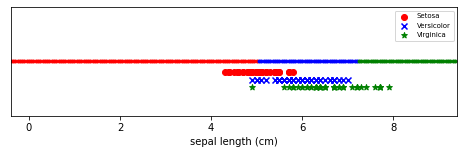

The loss function is : perceptron
Score:  0.5533333333333333
-------------------------


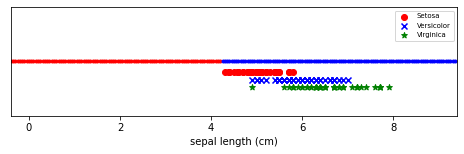

The loss function is : modified_huber
Score:  0.3333333333333333
-------------------------

Features : sepal width (cm)
**********************


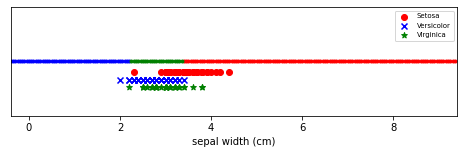

The loss function is : hinge
Score:  0.52
-------------------------


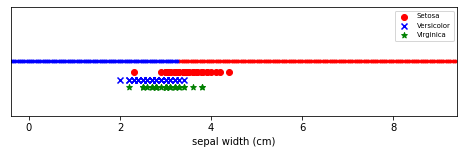

The loss function is : log
Score:  0.54
-------------------------


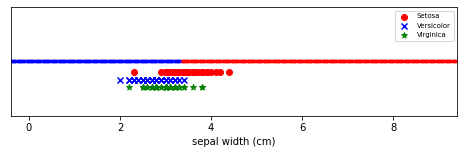

The loss function is : perceptron
Score:  0.5333333333333333
-------------------------


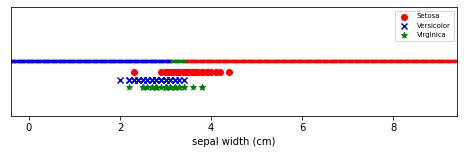

The loss function is : modified_huber
Score:  0.5133333333333333
-------------------------

Features : petal length (cm)
**********************


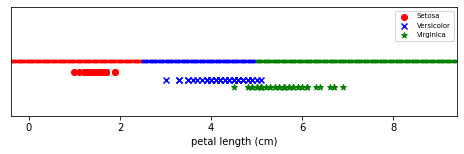

The loss function is : hinge
Score:  0.9466666666666667
-------------------------


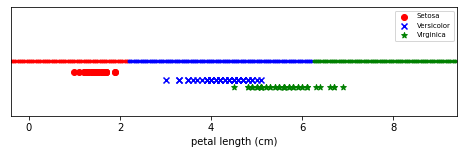

The loss function is : log
Score:  0.7066666666666667
-------------------------


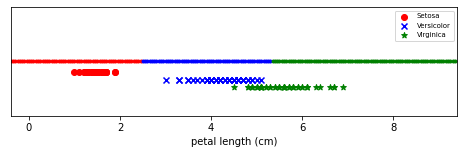

The loss function is : perceptron
Score:  0.8666666666666667
-------------------------


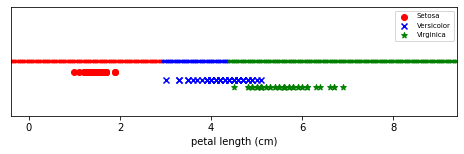

The loss function is : modified_huber
Score:  0.8333333333333334
-------------------------

Features : petal width (cm)
**********************


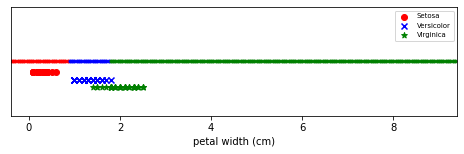

The loss function is : hinge
Score:  0.96
-------------------------


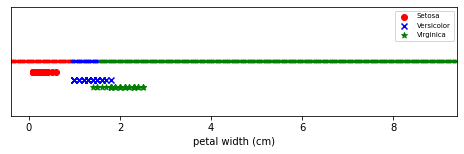

The loss function is : log
Score:  0.9466666666666667
-------------------------


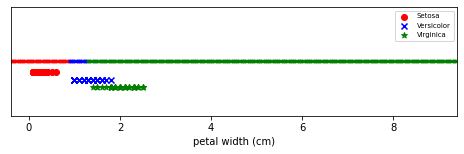

The loss function is : perceptron
Score:  0.7666666666666667
-------------------------


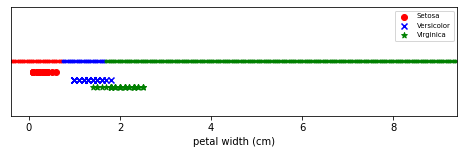

The loss function is : modified_huber
Score:  0.96
-------------------------

Features : sepal length (cm), sepal width (cm)
**********************


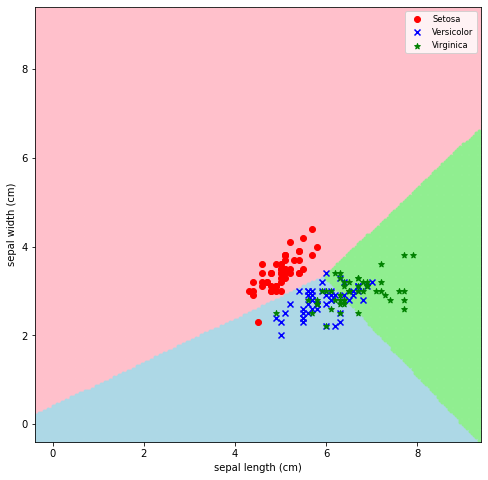

The loss function is : hinge
Score:  0.7733333333333333
-------------------------


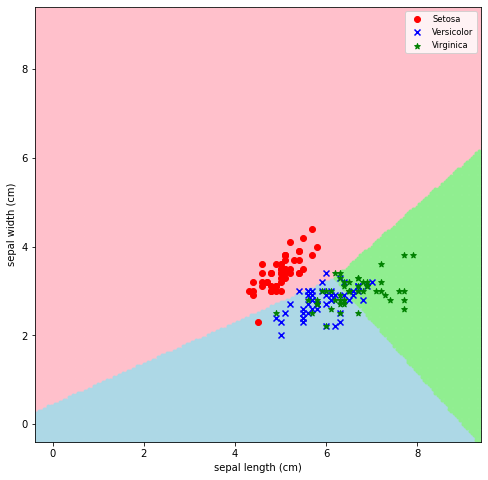

The loss function is : log
Score:  0.7666666666666667
-------------------------


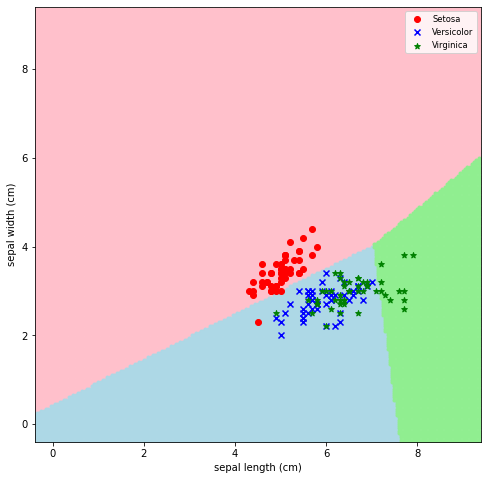

The loss function is : perceptron
Score:  0.7333333333333333
-------------------------


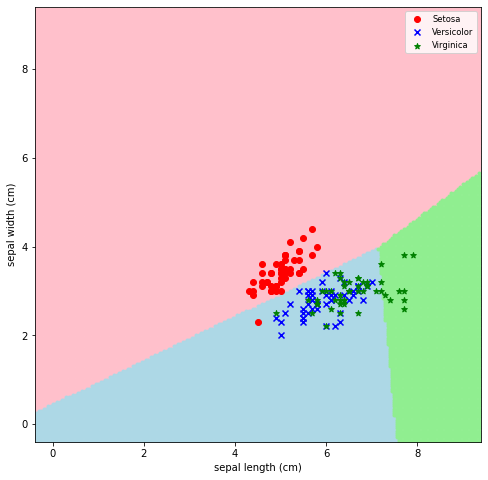

The loss function is : modified_huber
Score:  0.72
-------------------------

Features : sepal length (cm), petal length (cm)
**********************


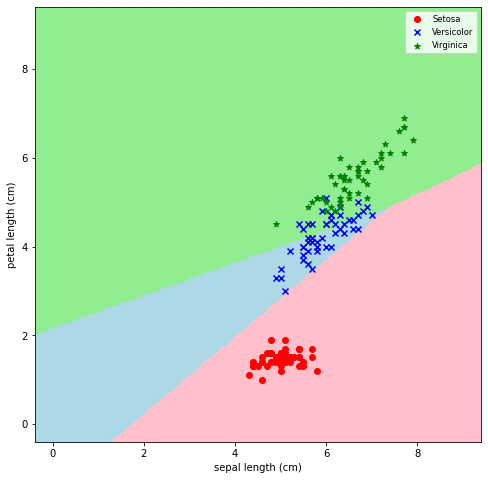

The loss function is : hinge
Score:  0.8733333333333333
-------------------------


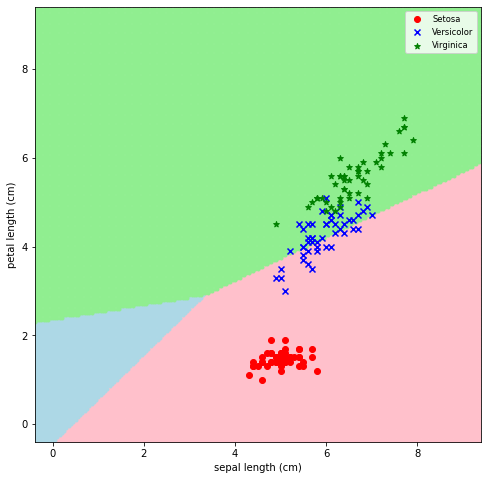

The loss function is : log
Score:  0.6666666666666666
-------------------------


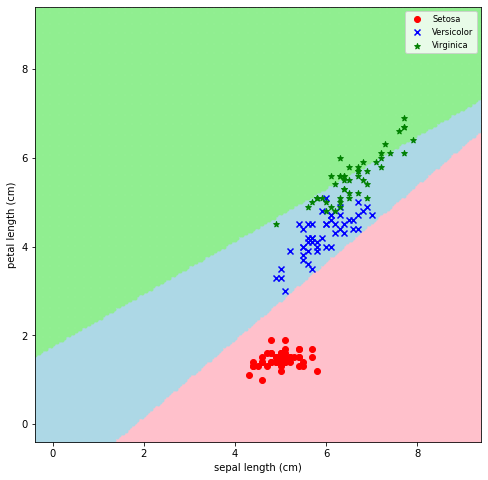

The loss function is : perceptron
Score:  0.7666666666666667
-------------------------


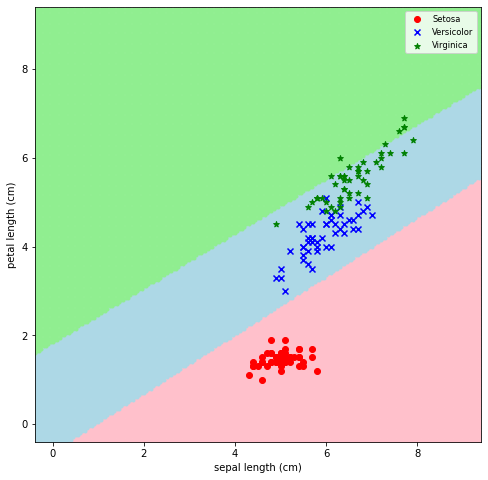

The loss function is : modified_huber
Score:  0.7066666666666667
-------------------------

Features : sepal length (cm), petal width (cm)
**********************


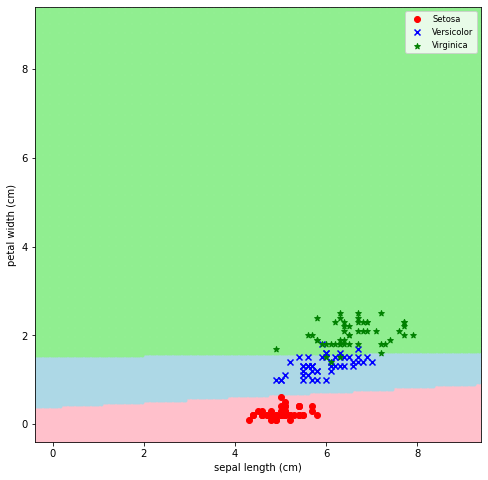

The loss function is : hinge
Score:  0.94
-------------------------


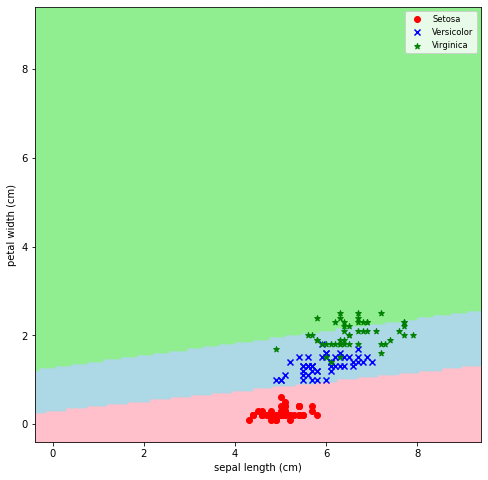

The loss function is : log
Score:  0.76
-------------------------


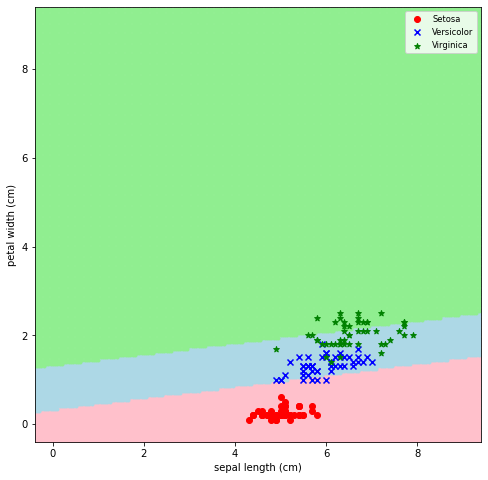

The loss function is : perceptron
Score:  0.7466666666666667
-------------------------


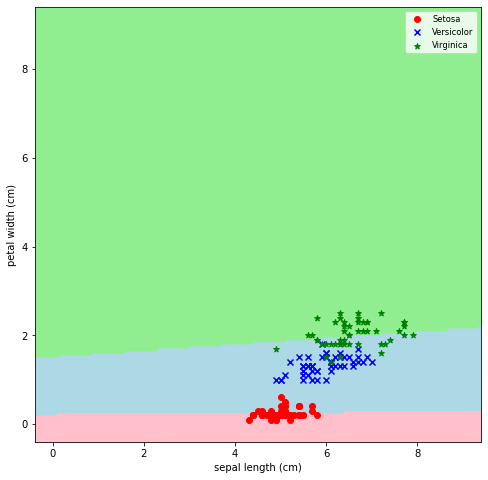

The loss function is : modified_huber
Score:  0.7266666666666667
-------------------------

Features : sepal width (cm), petal length (cm)
**********************


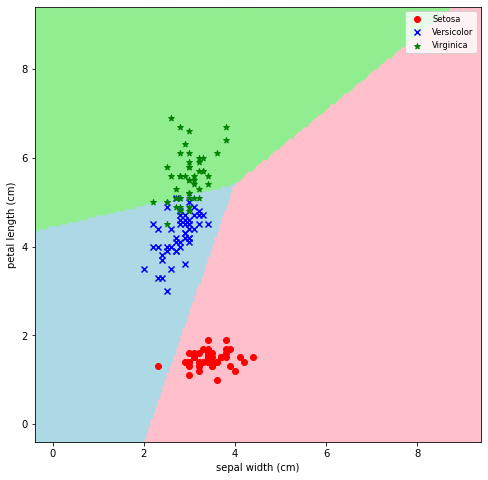

The loss function is : hinge
Score:  0.8866666666666667
-------------------------


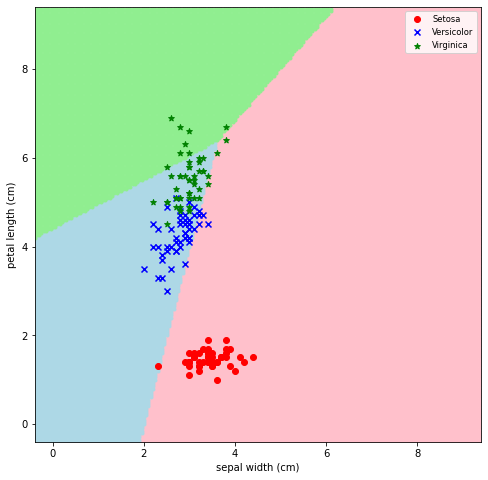

The loss function is : log
Score:  0.6866666666666666
-------------------------


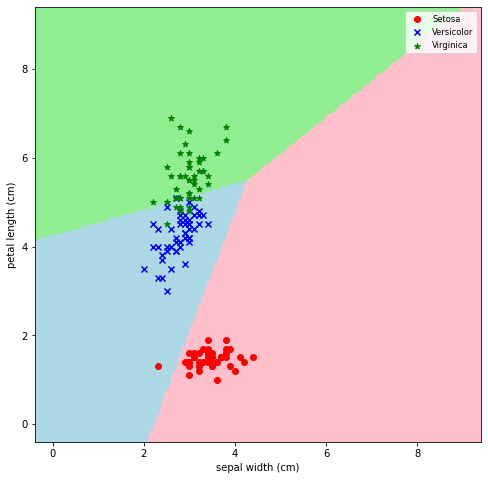

The loss function is : perceptron
Score:  0.9133333333333333
-------------------------


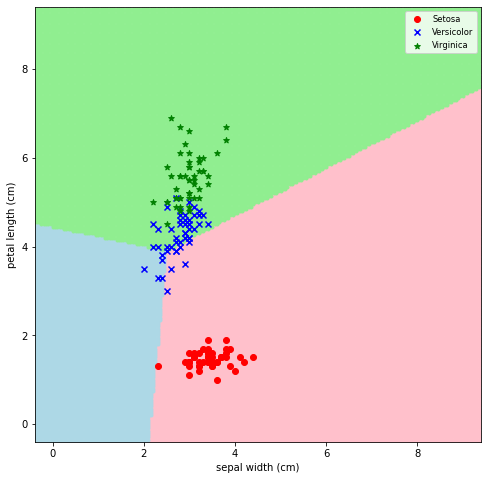

The loss function is : modified_huber
Score:  0.7
-------------------------

Features : sepal width (cm), petal width (cm)
**********************


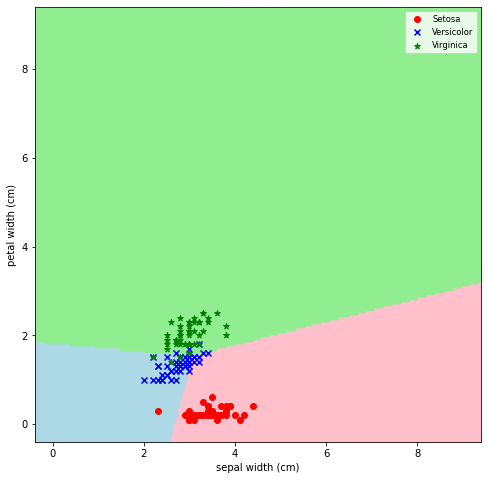

The loss function is : hinge
Score:  0.8933333333333333
-------------------------


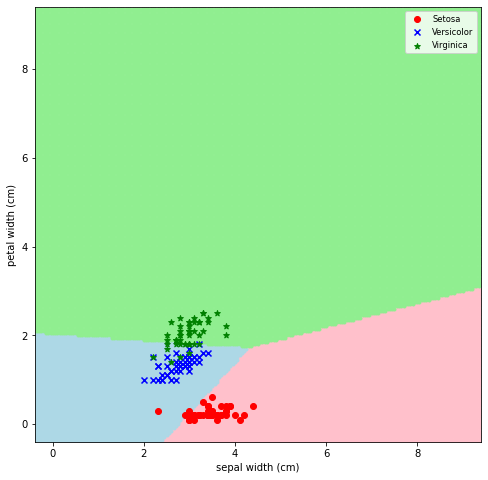

The loss function is : log
Score:  0.8733333333333333
-------------------------


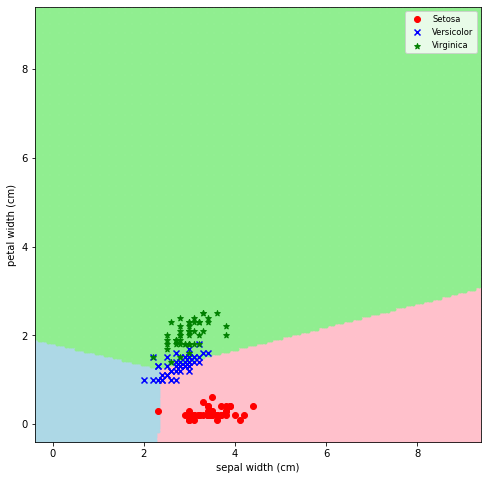

The loss function is : perceptron
Score:  0.68
-------------------------


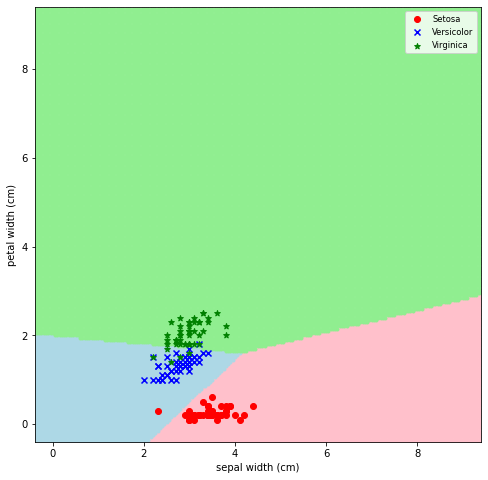

The loss function is : modified_huber
Score:  0.9533333333333334
-------------------------

Features : petal length (cm), petal width (cm)
**********************


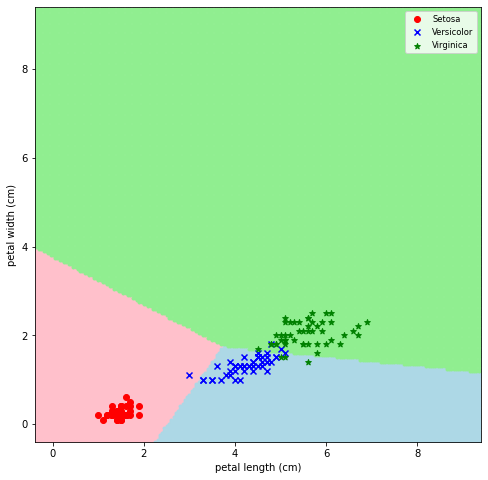

The loss function is : hinge
Score:  0.96
-------------------------


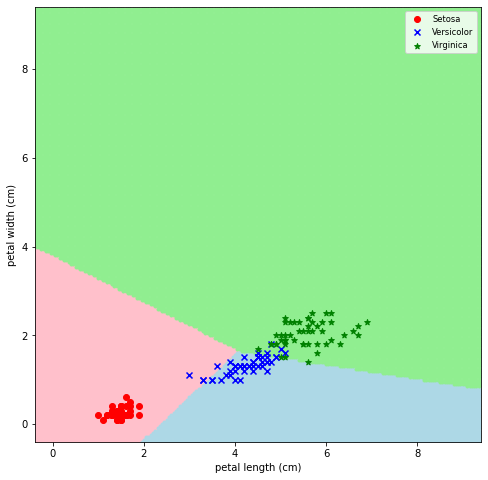

The loss function is : log
Score:  0.9266666666666666
-------------------------


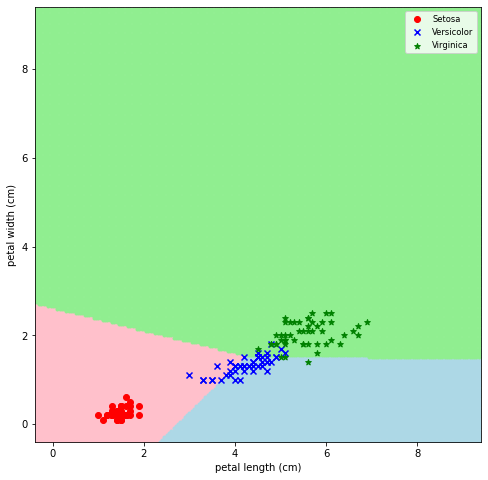

The loss function is : perceptron
Score:  0.8533333333333334
-------------------------


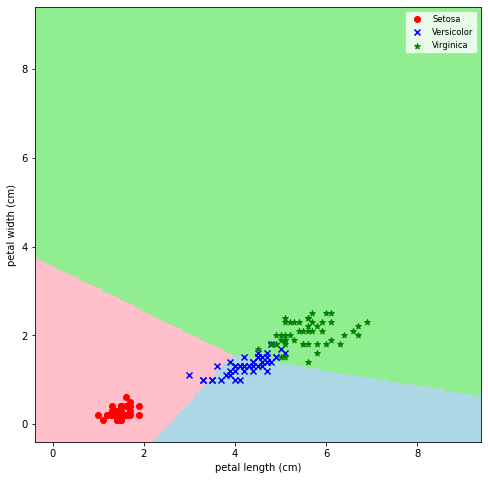

The loss function is : modified_huber
Score:  0.88
-------------------------

Features : sepal length (cm), sepal width (cm), petal length (cm)
**********************


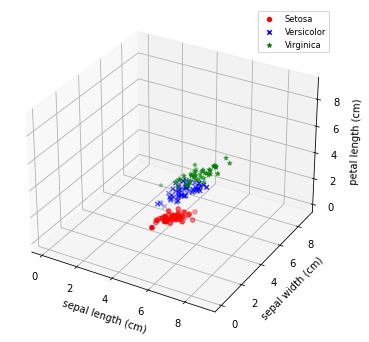

The loss function is : hinge
Score:  0.8866666666666667
-------------------------


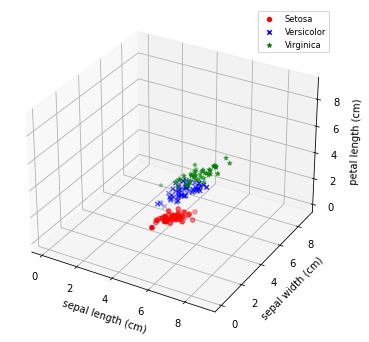

The loss function is : log
Score:  0.9066666666666666
-------------------------


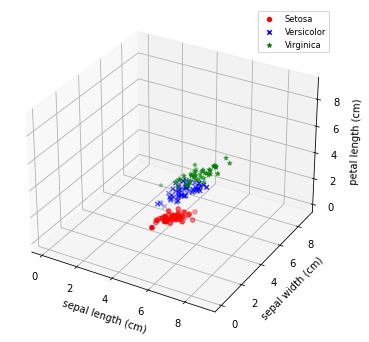

The loss function is : perceptron
Score:  0.6666666666666666
-------------------------


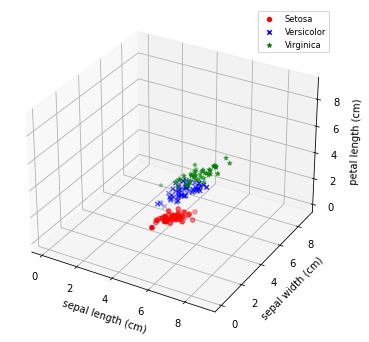

The loss function is : modified_huber
Score:  0.76
-------------------------

Features : sepal length (cm), sepal width (cm), petal width (cm)
**********************


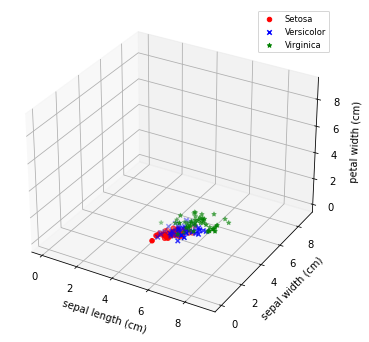

The loss function is : hinge
Score:  0.9266666666666666
-------------------------


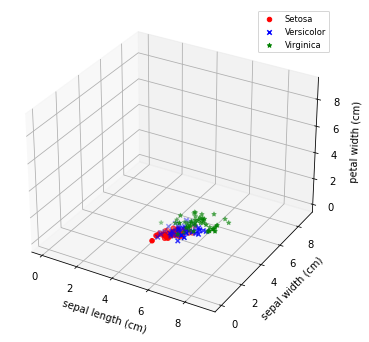

The loss function is : log
Score:  0.6066666666666667
-------------------------


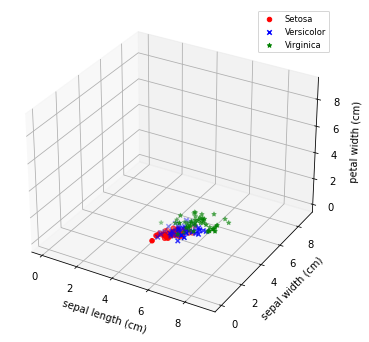

The loss function is : perceptron
Score:  0.9066666666666666
-------------------------


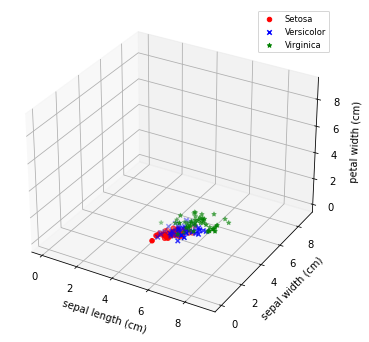

The loss function is : modified_huber
Score:  0.7866666666666666
-------------------------

Features : sepal length (cm), petal length (cm), petal width (cm)
**********************


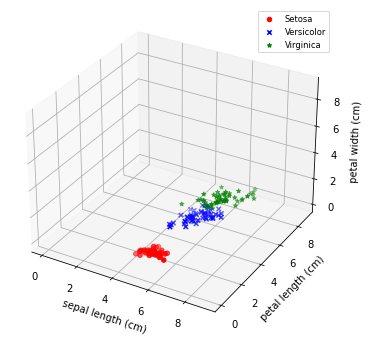

The loss function is : hinge
Score:  0.7933333333333333
-------------------------


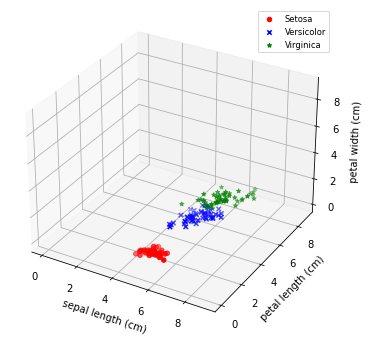

The loss function is : log
Score:  0.9533333333333334
-------------------------


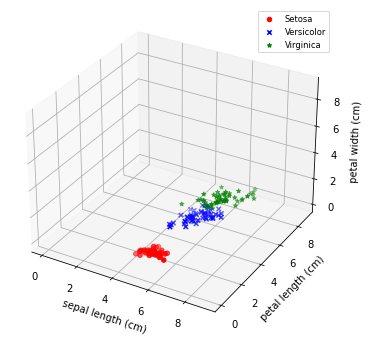

The loss function is : perceptron
Score:  0.8
-------------------------


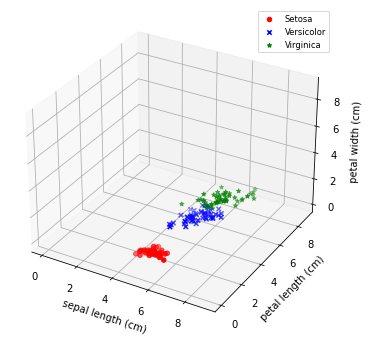

The loss function is : modified_huber
Score:  0.84
-------------------------

Features : sepal width (cm), petal length (cm), petal width (cm)
**********************


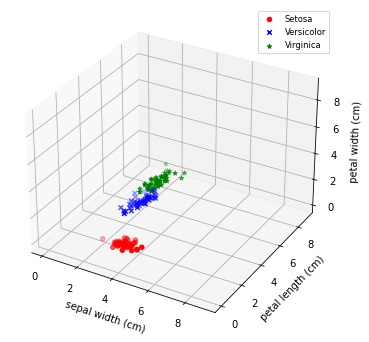

The loss function is : hinge
Score:  0.9133333333333333
-------------------------


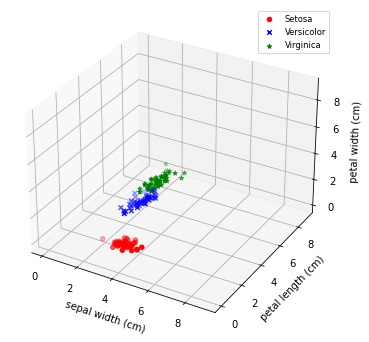

The loss function is : log
Score:  0.8
-------------------------


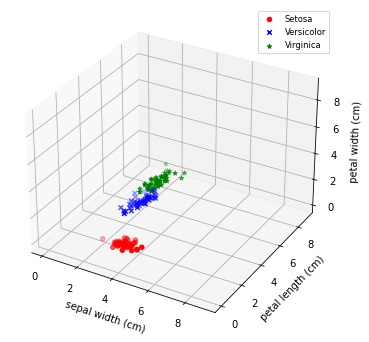

The loss function is : perceptron
Score:  0.7666666666666667
-------------------------


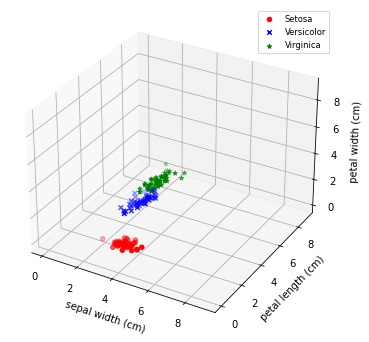

The loss function is : modified_huber
Score:  0.9533333333333334
-------------------------

Features : sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)
**********************
The loss function is : hinge
Score:  0.9666666666666667
-------------------------
The loss function is : log
Score:  0.5666666666666667
-------------------------
The loss function is : perceptron
Score:  0.9133333333333333
-------------------------
The loss function is : modified_huber
Score:  0.7933333333333333
-------------------------




In [37]:
#Printing all Functions. The Model

# clf = Perceptron(tol=1e-4, random_state=0)

for classes in allCombsC:
  cdx = np.array(classes)  
  printClasses(cdx)
  for feature in allCombsF:    
    fdx = np.array(feature) 
    printFeatures(fdx)
    XX, YY, XXzeros0, XXzeros1, XXzeros2 = getXXYY(cdx, fdx)
    for loss in lossFunctions:
      clf = SGDClassifier(tol=1e-4, random_state=0, loss = loss)
      clf.fit(XX,YY)
      plot(cdx, fdx, XX, YY, XXzeros0, XXzeros1, XXzeros2)
      print("The loss function is :", loss)
      print('Score: ',clf.score(XX,YY))
      print("-------------------------")
    print()
  print()


    

In [38]:
P = clf.get_params()
print ('\nAttributes: ',P)


Attributes:  {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


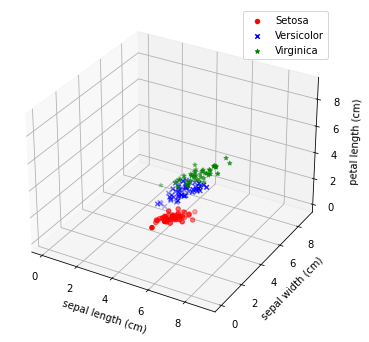

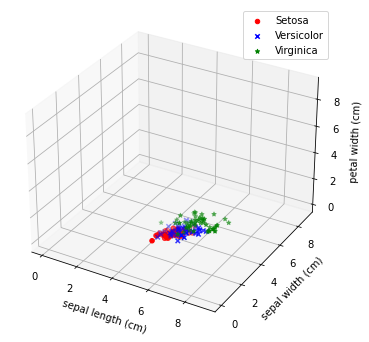

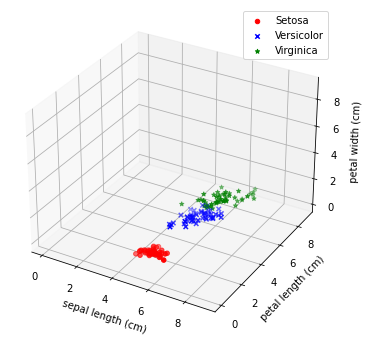

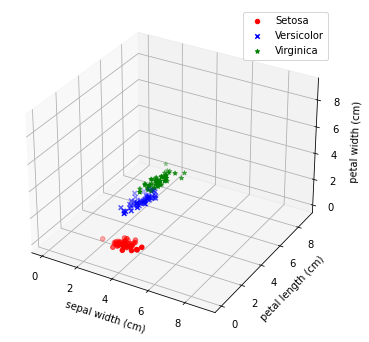

In [39]:
plt.close('all')

ix = [0,0,0,1]
iy = [1,1,2,2]
iz = [2,3,3,3]

for m in range(4):
    
    ixm = ix[m]
    iym = iy[m]
    izm = iz[m]
    xF = IrisF[ixm]
    yF = IrisF[iym]
    zF = IrisF[izm]

    fig = plt.figure(figsize=(6,6))    
    ax = plt.axes(projection='3d')   
    
    ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
        color=pltC[0], marker=pltM[0], label=IrisC[0])
    ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
        color=pltC[1], marker=pltM[1], label=IrisC[1])
    ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
        color=pltC[2], marker=pltM[2], label=IrisC[2])
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(x_min,x_max)
    ax.set_zlim(x_min,x_max)
    ax.set_xlabel(xF)
    ax.set_ylabel(yF)
    ax.set_zlabel(zF)            
    ax.legend(loc='upper right', fontsize='medium')

plt.show()    

In [42]:
#printing average score of loss functions for each feature used

# clf = Perceptron(tol=1e-4, random_state=0)

classSetosaVersi = {};
classSetosaVirginia = {};
classVersiVirginia = {};
classSetosaVersiVirginia = {};

for classes in allCombsC:
  cdx = np.array(classes) 

    
  #[0 1] = Setosa, Versicolor. [0 2] = Setosa Viginicia
  for feature in allCombsF:    
    fdx = np.array(feature) 
    XX, YY, XXzeros0, XXzeros1, XXzeros2 = getXXYY(cdx, fdx)
    count = 0;
    scoreTot = 0;
    
    for loss in lossFunctions:
      clf = SGDClassifier(tol=1e-4, random_state=0, loss = loss)
      clf.fit(XX,YY)
      count += 1
      scoreTot += clf.score(XX,YY)
        
    avgScore = scoreTot / count;   
#need an if statement for each class, and each feature
    
    #!!! Setosa VERSI CLASS!!!
    if((len(cdx) == 2) and ((cdx ==[0,1]).all())): #3 options if the length is 2 (using 2 features). only 1 option if length is 3
        if((fdx == [0]).all()): #now check what feature it is using its using
            classSetosaVersi['[0]'] = avgScore
        elif((fdx == [1]).all()):
            classSetosaVersi['[1]'] = avgScore
        elif((fdx == [2]).all()):
            classSetosaVersi['[2]'] = avgScore
        elif((fdx == [3]).all()):
            classSetosaVersi['[3]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [0, 1]).all()):
            classSetosaVersi['[0, 1]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [0, 2]).all()):
            classSetosaVersi['[0, 2]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [0, 3]).all()):
            classSetosaVersi['[0, 3]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [1, 2]).all()):
            classSetosaVersi['[1, 2]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [1, 3]).all()):
            classSetosaVersi['[1, 3]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [2, 3]).all()):
            classSetosaVersi['[2, 3]'] = avgScore
        elif((len(fdx) == 3) and (fdx == [0, 1, 2]).all()):
            classSetosaVersi['[0, 1, 2]'] = avgScore
        elif((len(fdx) == 3) and (fdx == [0, 1, 3]).all()):
            classSetosaVersi['[0, 1, 3]'] = avgScore
        elif((len(fdx) == 3) and (fdx == [0, 2, 3]).all()):
            classSetosaVersi['[0, 2, 3]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [1, 2, 3]).all()):
            classSetosaVersi['[1, 2, 3]'] = avgScore
        elif((len(fdx) == 4) and (fdx == [0, 1, 2, 3]).all()):
            classSetosaVersi['[0, 1, 2, 3]'] = avgScore
            
  #!!!SETOSA VIRGINIA CLASS!!!      
    if((len(cdx) == 2) and ((cdx ==[0,2]).all())): 
        if((fdx == [0]).all()): 
            classSetosaVirginia['[0]'] = avgScore
        elif((fdx == [1]).all()):
            classSetosaVirginia['[1]'] = avgScore
        elif((fdx == [2]).all()):
            classSetosaVirginia['[2]'] = avgScore
        elif((fdx == [3]).all()):
            classSetosaVirginia['[3]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [0, 1]).all()):
            classSetosaVirginia['[0, 1]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [0, 2]).all()):
            classSetosaVirginia['[0, 2]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [0, 3]).all()):
            classSetosaVirginia['[0, 3]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [1, 2]).all()):
            classSetosaVirginia['[1, 2]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [1, 3]).all()):
            classSetosaVirginia['[1, 3]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [2, 3]).all()):
            classSetosaVirginia['[2, 3]'] = avgScore
        elif((len(fdx) == 3) and (fdx == [0, 1, 2]).all()):
            classSetosaVirginia['[0, 1, 2]'] = avgScore
        elif((len(fdx) == 3) and (fdx == [0, 1, 3]).all()):
            classSetosaVirginia['[0, 1, 3]'] = avgScore
        elif((len(fdx) == 3) and (fdx == [0, 2, 3]).all()):
            classSetosaVirginia['[0, 2, 3]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [1, 2, 3]).all()):
            classSetosaVirginia['[1, 2, 3]'] = avgScore
        elif((len(fdx) == 4) and (fdx == [0, 1, 2, 3]).all()):
            classSetosaVirginia['[0, 1, 2, 3]'] = avgScore      

    #!!! VERSI VIRGINIA CLASS !!!
    if((len(cdx) == 3) and ((cdx ==[0,1,2]).all())): 
        if((fdx == [0]).all()): 
            classVersiVirginia['[0]'] = avgScore
        elif((fdx == [1]).all()):
            classVersiVirginia['[1]'] = avgScore
        elif((fdx == [2]).all()):
            classVersiVirginia['[2]'] = avgScore
        elif((fdx == [3]).all()):
            classVersiVirginia['[3]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [0, 1]).all()):
            classVersiVirginia['[0, 1]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [0, 2]).all()):
            classVersiVirginia['[0, 2]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [0, 3]).all()):
            classVersiVirginia['[0, 3]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [1, 2]).all()):
            classVersiVirginia['[1, 2]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [1, 3]).all()):
            classVersiVirginia['[1, 3]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [2, 3]).all()):
            classVersiVirginia['[2, 3]'] = avgScore
        elif((len(fdx) == 3) and (fdx == [0, 1, 2]).all()):
            classVersiVirginia['[0, 1, 2]'] = avgScore
        elif((len(fdx) == 3) and (fdx == [0, 1, 3]).all()):
            classVersiVirginia['[0, 1, 3]'] = avgScore
        elif((len(fdx) == 3) and (fdx == [0, 2, 3]).all()):
            classVersiVirginia['[0, 2, 3]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [1, 2, 3]).all()):
            classVersiVirginia['[1, 2, 3]'] = avgScore
        elif((len(fdx) == 4) and (fdx == [0, 1, 2, 3]).all()):
            classVersiVirginia['[0, 1, 2, 3]'] = avgScore 

    #!!! SETOSA VERSI VIRGINIA CLASS!!!
    if((len(cdx) == 2) and ((cdx ==[1,2]).all())): 
        if((fdx == [0]).all()): 
            classSetosaVersiVirginia['[0]'] = avgScore
        elif((fdx == [1]).all()):
            classSetosaVersiVirginia['[1]'] = avgScore
        elif((fdx == [2]).all()):
            classSetosaVersiVirginia['[2]'] = avgScore
        elif((fdx == [3]).all()):
            classSetosaVersiVirginia['[3]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [0, 1]).all()):
            classSetosaVersiVirginia['[0, 1]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [0, 2]).all()):
            classSetosaVersiVirginia['[0, 2]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [0, 3]).all()):
            classSetosaVersiVirginia['[0, 3]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [1, 2]).all()):
            classSetosaVersiVirginia['[1, 2]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [1, 3]).all()):
            classSetosaVersiVirginia['[1, 3]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [2, 3]).all()):
            classSetosaVersiVirginia['[2, 3]'] = avgScore
        elif((len(fdx) == 3) and (fdx == [0, 1, 2]).all()):
            classSetosaVersiVirginia['[0, 1, 2]'] = avgScore
        elif((len(fdx) == 3) and (fdx == [0, 1, 3]).all()):
            classSetosaVersiVirginia['[0, 1, 3]'] = avgScore
        elif((len(fdx) == 3) and (fdx == [0, 2, 3]).all()):
            classSetosaVersiVirginia['[0, 2, 3]'] = avgScore
        elif((len(fdx) == 2) and (fdx == [1, 2, 3]).all()):
            classSetosaVersiVirginia['[1, 2, 3]'] = avgScore
        elif((len(fdx) == 4) and (fdx == [0, 1, 2, 3]).all()):
            classSetosaVersiVirginia['[0, 1, 2, 3]'] = avgScore
            
    #featNum += 1;

    avgScore = scoreTot / count;



## Averaged Scores

[0]: Sepal Length 
[1]: Sepal Width 
[2]: Petal Length 
[3]: Petal Width


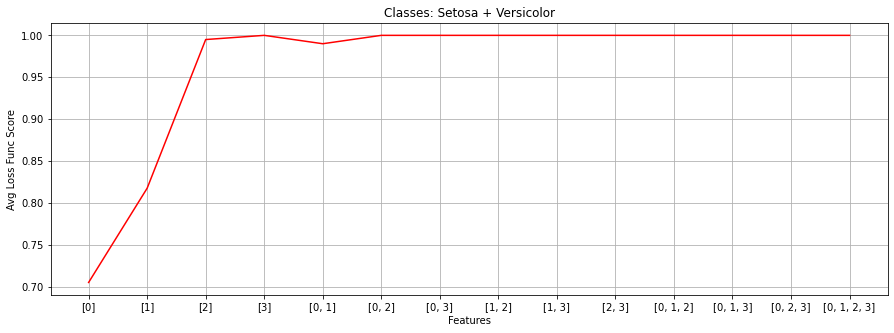

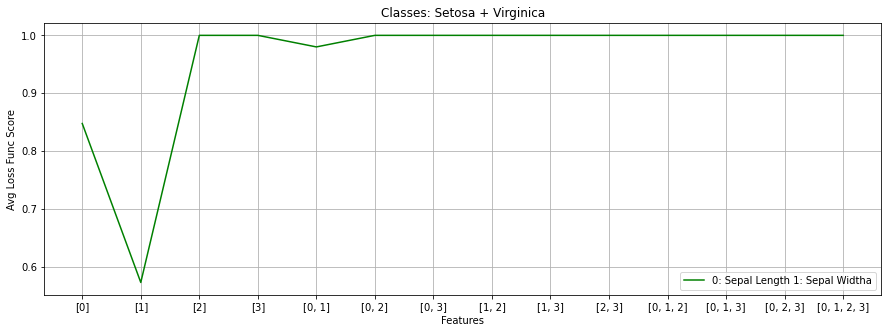

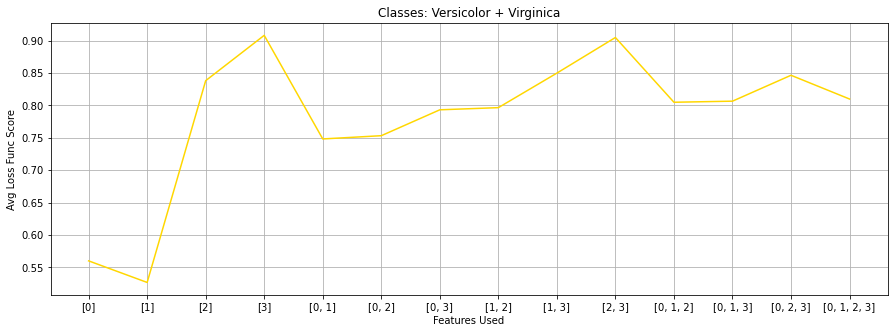

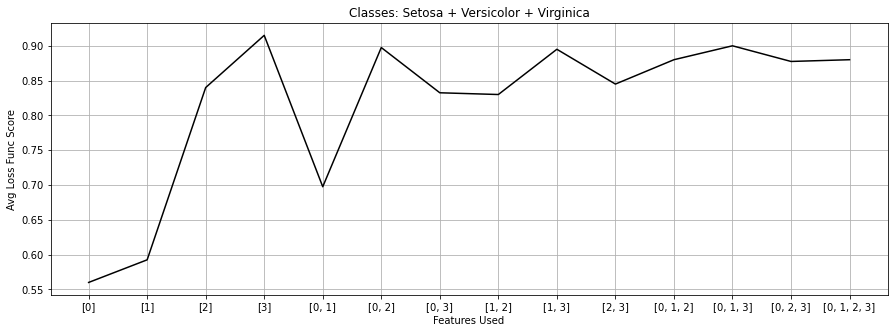

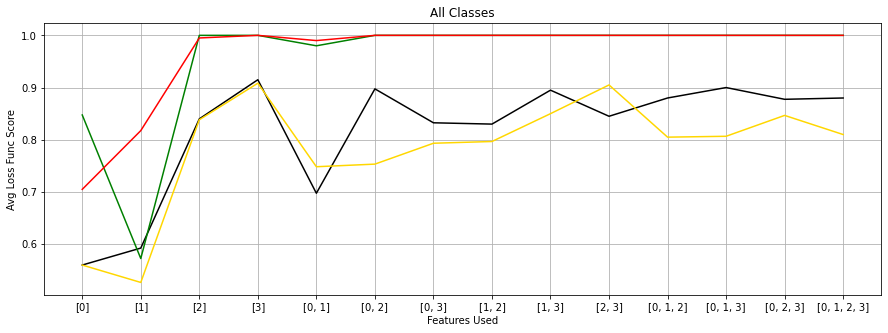

In [43]:
#Printing the datasets made above

classSetVersX = list(classSetosaVersi.keys())
classSetVersY = list(classSetosaVersi.values())    
fig = plt.figure(figsize = (15, 5))
plt.plot(classSetVersX, classSetVersY, color = 'red')
plt.xlabel('Features')
plt.ylabel('Avg Loss Func Score')
plt.title('Classes: Setosa + Versicolor')
plt.grid(True)
plt.show

classSetVirgX = list(classSetosaVirginia.keys())
classSetVirgY = list(classSetosaVirginia.values())    
fig = plt.figure(figsize = (15, 5))
plt.plot(classSetVirgX, classSetVirgY, color = 'green')
plt.xlabel('Features')
plt.ylabel('Avg Loss Func Score')
plt.title('Classes: Setosa + Virginica')
plt.grid(True)
plt.legend(["0: Sepal Length 1: Sepal Widtha"])
plt.show

classVersiVirgX = list(classVersiVirginia.keys())
classVersiVirgY = list(classVersiVirginia.values())
fig = plt.figure(figsize = (15, 5))
plt.plot(classVersiVirgX, classVersiVirgY, color = 'gold')
plt.xlabel('Features Used')
plt.ylabel('Avg Loss Func Score')
plt.title('Classes: Versicolor + Virginica')
plt.grid(True)
plt.show

classSetVersiVirgX = list(classSetosaVersiVirginia.keys())
classSetVersiVirgY = list(classSetosaVersiVirginia.values())
fig = plt.figure(figsize = (15, 5))
plt.plot(classSetVersiVirgX, classSetVersiVirgY, color = 'black')
plt.xlabel('Features Used')
plt.ylabel('Avg Loss Func Score')
plt.title('Classes: Setosa + Versicolor + Virginica')
plt.grid(True)
plt.show



fig = plt.figure(figsize = (15, 5))
plt.plot(classSetVersiVirgX, classSetVersiVirgY, color = 'black')
plt.plot(classVersiVirgX, classVersiVirgY, color = 'gold')
plt.plot(classSetVirgX, classSetVirgY, color = 'green')
plt.plot(classSetVersX, classSetVersY, color = 'red')
plt.xlabel('Features Used')
plt.ylabel('Avg Loss Func Score')
plt.title('All Classes')
plt.grid(True)
plt.show


print('[0]: Sepal Length \n[1]: Sepal Width \n[2]: Petal Length \n[3]: Petal Width')

## Score Distribution for each Function

<function matplotlib.pyplot.show(close=None, block=None)>

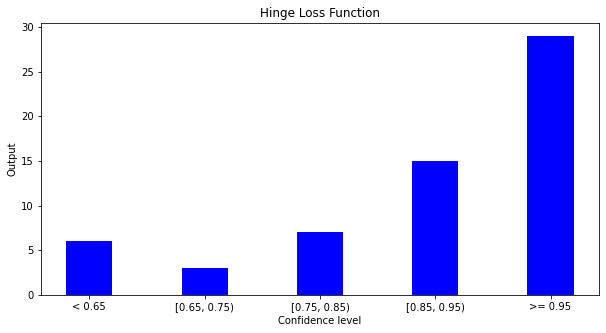

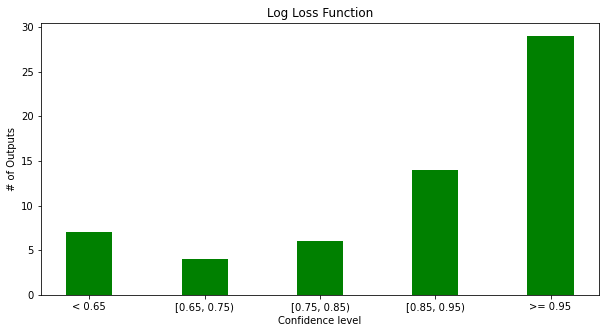

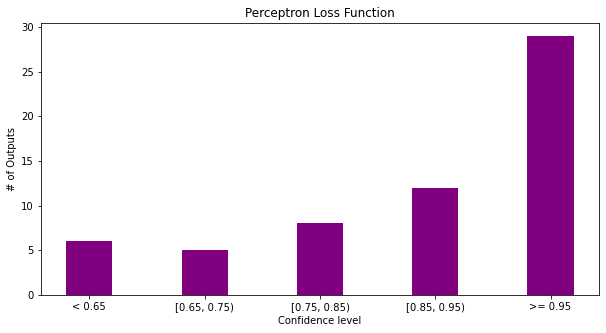

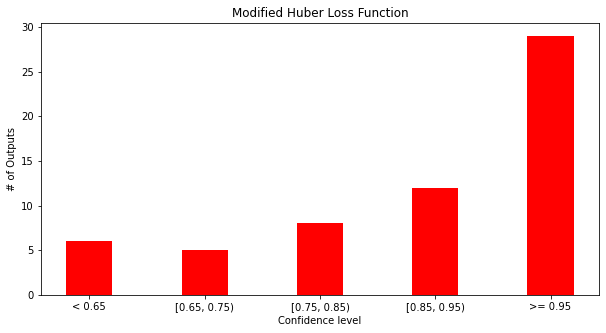

In [44]:
# Bar graphs of each loss functions score distribution

hingeCount9 = 0;
logCount9 = 0;
percCount9 = 0;
hubCount9 = 0;

hingeY = []
logY = []
percY = []
hubY = []

#hinge, log, perceptron, modified_huberx

#putting each function's score into array
for classes in allCombsC:
  cdx = np.array(classes)  
  for feature in allCombsF:    
    fdx = np.array(feature) 
    XX, YY, XXzeros0, XXzeros1, XXzeros2 = getXXYY(cdx, fdx)
    for lossFunc in lossFunctions:
      clf = SGDClassifier(tol=1e-4, random_state=0, loss = lossFunc)
      clf.fit(XX,YY)
      if(lossFunc == 'hinge'):
        hingeY.append(clf.score(XX,YY))
      elif(lossFunc == 'log'):
        logY.append(clf.score(XX,YY))
      elif(lossFunc == 'perceptron'):
        percY.append(clf.score(XX,YY))
      else:
        hubY.append(clf.score(XX,YY))


#Creating x-axis for plots
xAxis = np.arange(0.0, 1.0, .05);


hingeBad, hingeDecent, hingeGood, hingeGreat, hingeIdeal = 0,0,0,0,0
logBad, logDecent, logGood, logGreat, logIdeal = 0,0,0,0,0
percBad, percDecent, percGood, percGreat, percIdeal = 0,0,0,0,0
hubBad, hubDecent, hubGood, hubGreat, hubIdeal = 0,0,0,0,0

#dividing the scores into diffe bins categories:
    # 'Bad' : score < .65, 'decent': [.65, .75)
    # 'Good': [.75, .85), 'Great' [.85, .95), 'Ideal': [.95,1.0], '
for i in hingeY:
    if(i < .65): #bad score range
        hingeBad += 1
    if((i >= .65) and (i < .75)): #decent
        hingeDecent += 1
    if((i >= .75) and (i < .85)): #good
        hingeGood += 1
    if((i >= .85) and (i < .95)): #Great
        hingeGreat += 1
    if(i >= .95): #Ideal
        hingeIdeal += 1
        
for i in logY:
    if(i < .65): 
        logBad += 1
    if((i >= .65) and (i < .75)): 
        logDecent += 1
    if((i >= .75) and (i < .85)): 
        logGood += 1
    if((i >= .85) and (i < .95)): 
        logGreat += 1
    if(i >= .95): 
        logIdeal += 1
        
for i in percY:
    if(i < .65): 
        percBad += 1
    if((i >= .65) and (i < .75)): 
        percDecent += 1
    if((i >= .75) and (i < .85)): 
        percGood += 1
    if((i >= .85) and (i < .95)): 
        percGreat += 1
    if(i >= .95): 
        percIdeal += 1 
        
for i in hubY:
    if(i < .65): 
        hubBad += 1
    if((i >= .65) and (i < .75)): 
        hubDecent += 1
    if((i >= .75) and (i < .85)): 
        hubGood += 1
    if((i >= .85) and (i < .95)): 
        hubGreat += 1
    if(i >= .95): 
        hubIdeal += 1

#Making usable data set

hingeData = {'< 0.65': hingeBad, '[0.65, 0.75)': hingeDecent, '[0.75, 0.85)': hingeGood, '[0.85, 0.95)': hingeGreat, '>= 0.95': hingeIdeal}
hingeXData = list(hingeData.keys())
hingeYData = list(hingeData.values())        
fig = plt.figure(figsize = (10, 5))
plt.bar(hingeXData, hingeYData, color = 'blue', width = 0.4)
plt.xlabel('Confidence level')
plt.ylabel('Output')
plt.title('Hinge Loss Function')
plt.show

#so the above works and prints a bar graphs. Change the keys so
#that is shows the ranges, not the names. rinse and repeat this for 
#the other functions then go from there


logData = {'< 0.65': logBad, '[0.65, 0.75)': logDecent, '[0.75, 0.85)': logGood, '[0.85, 0.95)': logGreat, '>= 0.95': logIdeal}
logXData = list(logData.keys())
logYData = list(logData.values())    
fig = plt.figure(figsize = (10, 5))
plt.bar(logXData, logYData, color = 'Green', width = 0.4)
plt.xlabel('Confidence level')
plt.ylabel('# of Outputs')
plt.title('Log Loss Function')
plt.show


percData = {'< 0.65': percBad, '[0.65, 0.75)': percDecent, '[0.75, 0.85)': percGood, '[0.85, 0.95)': percGreat, '>= 0.95': percIdeal}
percXData = list(percData.keys())
percYData = list(percData.values())   
fig = plt.figure(figsize = (10, 5))
plt.bar(percXData, percYData, color = 'purple', width = 0.4)
plt.xlabel('Confidence level')
plt.ylabel('# of Outputs')
plt.title('Perceptron Loss Function')
plt.show

hubData = {'< 0.65': hubBad, '[0.65, 0.75)': hubDecent, '[0.75, 0.85)': hubGood, '[0.85, 0.95)': hubGreat, '>= 0.95': hubIdeal}
hubXData = list(hubData.keys())
hubYData = list(hubData.values())        
fig = plt.figure(figsize = (10, 5))
plt.bar(percXData, percYData, color = 'Red', width = 0.4)
plt.xlabel('Confidence level')
plt.ylabel('# of Outputs')
plt.title('Modified Huber Loss Function')
plt.show










## Analysis & Conclusion


After generating the loss functions' [graphs and scores](#Loss-Function-Graphs-&-Scores), I began looking at the [score distribution](#Score-Distribution-for-each-Function) of each loss function. I wanted to know if any of the functions used that returned poor scores before proceeding with other analysis. Though we should expect there to be a similar distribution due to the dataset being strong, I thought it would be important to verify. The graphs were created by keeping track what class and feature set the current generated score belonged to, and updating the corresponding count variable for which range the score fell between. As seen in the graphs, the functions have nearly equivalent score distributions, verifying that the data set is strong and that we can use all of the outputs.

After verifying the outputs, let's see which feature set are good and bad identifiers. To do this, I averaged the 4 different scores generated for each feature set of a given class combination together. These are the [results](#Averaged-Scores). We can tell at a first glance that these graphs are similiar in shape, with one main difference being the Y-Axis ranges though, still close in value. Once we begin to look a bit deeper we can see that for every class combination, the 3 lowest points on each graph is when either sepal length or width is used as a feature. Meaning that these are not good identifiers. We can say this with confidence because it happens in all of the different class combinations, and not just for a single function. Showing that the data is consistent with all functions.